# What

> The Jigsaw Unintended Bias in Toxicity Classification Dataset is a dataset focoused on detecting toxicity in text with the extra worry about not having a bias to classify words that represent minorities as toxic.    
 
> The dataset has:  
> - 1999516 rows  
> - 46 columns   

# Why

# Imports

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Plot Config

In [51]:
# Custom purple color palette
purple_palette = ['#9b59b6', '#AF7AC5', '#C39BD3', '#D7BDE2', '#E8DAEF']  

# Darker purple palette
dark_purple_palette = ['#6A0DAD', '#8E44AD', '#9B59B6', '#B19CD9', '#D2B4DE']

# More vibrant purple palette
vibrant_purple_palette = ['#4A148C', '#6A1B9A', '#8E24AA', '#AB47BC', '#CE93D8']

In [52]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('default')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Aux Functions

In [53]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [54]:
def plot_top_words(corpus, n=10, figsize=(12, 6), title=None, purple_palette=purple_palette):
    # Initialize and fit CountVectorizer
    count_vectorizer = CountVectorizer(stop_words='english')
    count_matrix = count_vectorizer.fit_transform(corpus)
    
    # Get word frequencies
    word_freq = dict(zip(count_vectorizer.get_feature_names_out(), 
                        count_matrix.sum(axis=0).A1))
    
    # Get top n most frequent words
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    words, frequencies = zip(*top_words)
    
    # Create plot
    fig = plt.figure(figsize=figsize)
    
    # Use purple_palette colors cyclically
    colors = [purple_palette[i % len(purple_palette)] for i in range(n)]
    
    bars = plt.bar(words, frequencies, color=colors, edgecolor='black')
    
    # Set title
    if title is None:
        title = f'Top {n} Most Frequent Words (Raw Count)'
    plt.title(title, pad=20)
    
    # Customize axes
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    
    # Add frequency labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    
    # Add grid and adjust layout
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    return word_freq, fig

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def unique_wordcloud(corpus1, corpus2, max_words=100, figsize=(12, 8), 
                     background_color='white', purple_palette=purple_palette, title=None):
    
    # Create a custom colormap from the purple palette
    n_bins = len(purple_palette)
    custom_cmap = LinearSegmentedColormap.from_list("custom_purple", purple_palette, N=n_bins)
    
    # Initialize lemmatizer and stop words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    def process_text(text):
        words = word_tokenize(text.lower())
        return [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    
    # Process both corpora
    words1 = [word for text in corpus1 for word in process_text(text)]
    words2 = set([word for text in corpus2 for word in process_text(text)])
    
    # Count frequencies of words in corpus1 that are not in corpus2
    word_freq = Counter([word for word in words1 if word not in words2])
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, 
                          background_color=background_color, 
                          colormap=custom_cmap,
                          max_words=max_words).generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=16)
    plt.tight_layout(pad=0)
    plt.show()
    
    return dict(word_freq)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiasartori/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
def compare_corpora(corpus1, corpus2, min_freq=5, top_n=100, min_diff_ratio=0.0001, purple_palette=purple_palette):
    # Create a custom colormap from the purple palette
    n_bins = len(purple_palette)
    custom_cmap = LinearSegmentedColormap.from_list("custom_purple", purple_palette, N=n_bins)
    
    # Print corpus sizes
    print(f"Corpus 1 size: {len(corpus1)}")
    print(f"Corpus 2 size: {len(corpus2)}")
    
    # Initialize and fit CountVectorizer
    vectorizer = CountVectorizer(stop_words='english', min_df=min_freq)
    
    # Get word counts
    counts1 = vectorizer.fit_transform(corpus1)
    counts2 = vectorizer.transform(corpus2)
    
    # Get total words
    total_words1 = counts1.sum()
    total_words2 = counts2.sum()
    
    print(f"Total words in corpus 1: {total_words1}")
    print(f"Total words in corpus 2: {total_words2}")
    
    # Get frequencies
    freq1 = np.asarray(counts1.sum(axis=0)).ravel()
    freq2 = np.asarray(counts2.sum(axis=0)).ravel()
    
    # Calculate relative frequencies
    rel_freq1 = freq1 / total_words1
    rel_freq2 = freq2 / total_words2
    
    # Calculate distinctiveness score
    diff_ratio = (rel_freq1 - rel_freq2) / (rel_freq1 + rel_freq2 + 1e-10)
    distinctiveness = diff_ratio * np.log1p(freq1)
    
    # Create word score dictionary
    word_scores = {}
    words = vectorizer.get_feature_names_out()
    
    for word, score, f1, rf1, rf2 in zip(words, distinctiveness, freq1, rel_freq1, rel_freq2):
        if (f1 >= min_freq and 
            rf1 > rf2 and 
            (rf1 - rf2) / (rf1 + rf2) > min_diff_ratio):
            word_scores[word] = score
    
    print(f"Number of words meeting criteria: {len(word_scores)}")
    
    if not word_scores:
        print("No words meet the current criteria. Try adjusting the parameters.")
        return {}
    
    # Sort and get top words
    word_scores = dict(sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    # Create word cloud
    plt.figure(figsize=(12, 8))
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap=custom_cmap).generate_from_frequencies(word_scores)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Distinctive Words in Toxic Corpus', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Display top 20 words
    plt.figure(figsize=(12, 6))
    top_20 = dict(list(word_scores.items())[:20])
    
    # Use purple_palette colors cyclically for bars
    bar_colors = [purple_palette[i % len(purple_palette)] for i in range(len(top_20))]
    
    bars = plt.bar(top_20.keys(), top_20.values(), color=bar_colors, edgecolor='black')
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Most Distinctive Words')
    plt.xlabel('Words')
    plt.ylabel('Distinctiveness Score')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print top 20 words with their frequencies
    print("\nTop 20 distinctive words with frequencies:")
    for word in list(word_scores.keys())[:20]:
        idx = np.where(words == word)[0][0]
        print(f"{word:20} Corpus1: {freq1[idx]:5d} ({rel_freq1[idx]:.6f}) | "
              f"Corpus2: {freq2[idx]:5d} ({rel_freq2[idx]:.6f})")
    
    return word_scores


# Data Exploration

### Loading Dataset

In [57]:
df = pd.read_csv("../../data/all_data.csv")

### Basics Stats

In [58]:
df.shape

(1999516, 46)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

In [60]:
df.describe()

id  publication_id     parent_id    article_id         funny  \
count  1.999516e+06    1.999516e+06  1.134709e+06  1.999516e+06  1.999516e+06   
mean   4.065400e+06    4.988997e+01  3.715138e+06  2.810257e+05  2.776687e-01   
std    2.527563e+06    2.771895e+01  2.451507e+06  1.040778e+05  1.054819e+00   
min    5.984800e+04    2.000000e+00  6.100600e+04  2.006000e+03  0.000000e+00   
25%    8.565798e+05    2.100000e+01  7.930110e+05  1.600038e+05  0.000000e+00   
50%    5.340220e+06    5.400000e+01  5.217531e+06  3.319250e+05  0.000000e+00   
75%    5.955782e+06    5.400000e+01  5.774684e+06  3.662270e+05  0.000000e+00   
max    7.194640e+06    1.150000e+02  6.333965e+06  3.995440e+05  1.020000e+02   

                wow           sad         likes      disagree      toxicity  \
count  1.999516e+06  1.999516e+06  1.999516e+06  1.999516e+06  1.999516e+06   
mean   4.437174e-02  1.089289e-01  2.441188e+00  5.808151e-01  1.029241e-01   
std    2.458644e-01  4.555570e-01  4.712994e+00  1.854332e+00  1.970386e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  3.000000e+00  0.000000e+00  1.666667e-01   
max    2.100000e+01  3.100000e+01  3.000000e+02  1.870000e+02  1.000000e+00   

       ...          white          asian         latino  \
count  ...  448000.000000  448000.000000  448000.000000   
mean   ...       0.056534       0.011886       0.006151   
std    ...       0.215175       0.086906       0.058828   
min    ...       0.000000       0.000000       0.000000   
25%    ...       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000   
75%    ...       0.000000       0.000000       0.000000   
max    ...       1.000000       1.000000       1.000000   

       other_race_or_ethnicity  physical_disability  \
count            448000.000000        448000.000000   
mean                  0.008158             0.001351   
std                   0.042429             0.017461   
min                   0.000000             0.000000   
25%                   0.000000             0.000000   
50%                   0.000000             0.000000   
75%                   0.000000             0.000000   
max                   1.000000             1.000000   

       intellectual_or_learning_disability  psychiatric_or_mental_illness  \
count                        448000.000000                  448000.000000   
mean                              0.001117                       0.012068   
std                               0.016391                       0.089072   
min                               0.000000                       0.000000   
25%                               0.000000                       0.000000   
50%                               0.000000                       0.000000   
75%                               0.000000                       0.000000   
max                               1.000000                       1.000000   

       other_disability  identity_annotator_count  toxicity_annotator_count  
count     448000.000000              1.999516e+06              1.999516e+06  
mean           0.001219              1.431667e+00              8.775720e+00  
std            0.014114              1.763593e+01              4.331605e+01  
min            0.000000              0.000000e+00              3.000000e+00  
25%            0.000000              0.000000e+00              4.000000e+00  
50%            0.000000              0.000000e+00              4.000000e+00  
75%            0.000000              0.000000e+00              6.000000e+00  
max            0.600000              1.866000e+03              4.936000e+03  

[8 rows x 42 columns]

In [61]:
df.isna().sum()

id                                           0
comment_text                                 4
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

In [62]:
df.head()

id                                       comment_text  split  \
0  1083994  He got his money... now he lies in wait till a...  train   
1   650904  Mad dog will surely put the liberals in mental...  train   
2  5902188  And Trump continues his lifelong cowardice by ...  train   
3  7084460  "while arresting a man for resisting arrest".\...   test   
4  5410943     Tucker and Paul are both total bad ass mofo's.  train   

                    created_date  publication_id  parent_id  article_id  \
0  2017-03-06 15:21:53.675241+00              21        NaN      317120   
1  2016-12-02 16:44:21.329535+00              21        NaN      154086   
2  2017-09-05 19:05:32.341360+00              55        NaN      374342   
3  2016-11-01 16:53:33.561631+00              13        NaN      149218   
4  2017-06-14 05:08:21.997315+00              21        NaN      344096   

     rating  funny  wow  ...  white  asian  latino  other_race_or_ethnicity  \
0  approved      0    0  ...    NaN    NaN     NaN                      NaN   
1  approved      0    0  ...    NaN    NaN     NaN                      NaN   
2  approved      1    0  ...    NaN    NaN     NaN                      NaN   
3  approved      0    0  ...    NaN    NaN     NaN                      NaN   
4  approved      0    0  ...    NaN    NaN     NaN                      NaN   

   physical_disability  intellectual_or_learning_disability  \
0                  NaN                                  NaN   
1                  NaN                                  NaN   
2                  NaN                                  NaN   
3                  NaN                                  NaN   
4                  NaN                                  NaN   

   psychiatric_or_mental_illness  other_disability  identity_annotator_count  \
0                            NaN               NaN                         0   
1                            NaN               NaN                         0   
2                            NaN               NaN                         0   
3                            NaN               NaN                         0   
4                            NaN               NaN                         0   

   toxicity_annotator_count  
0                        67  
1                        76  
2                        63  
3                        76  
4                        80  

[5 rows x 46 columns]

In [63]:
df.columns

Index(['id', 'comment_text', 'split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
       'identity_attack', 'insult', 'threat', 'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability', 'identity_annotator_count',
       'toxicity_annotator_count'],
      dtype='object')

### Basic Cleaning

> dropping some useless features

In [64]:
df = df.drop(columns=['id','split', 'created_date', 'publication_id',
       'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes',
       'disagree'])

In [65]:
df['comment_text'] = df['comment_text'].fillna('')

demographic_cols = [
    'male', 'female', 'transgender', 'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
    'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
    'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
    'latino', 'other_race_or_ethnicity', 'physical_disability',
    'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
    'other_disability'
]
df[demographic_cols] = df[demographic_cols].fillna(0)


### Text Analysis

adding a lemmatized text column

In [66]:
df['lemmatized_text'] = df['comment_text'].apply(lemmatize_text)

> separing toxic categories and creating aux dfs for toxic and non-toxic analysis

In [67]:
toxic_categories = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
                   'identity_attack', 'insult', 'threat']

# Toxic if any category >= 0.5
toxic_df = df[df[toxic_categories].ge(0.5).any(axis=1)]
# Non-toxic if all categories < 0.5
non_toxic_df = df[df[toxic_categories].lt(0.5).all(axis=1)]


> word count analysis

In [68]:
# Character length analysis
char_length = df['comment_text'].str.len()
word_count = df['comment_text'].str.split().str.len()

print('mean char length = ', char_length.mean())
print('mean word count = ', word_count.mean())

mean char length =  297.2532567881427
mean word count =  51.28543657565131


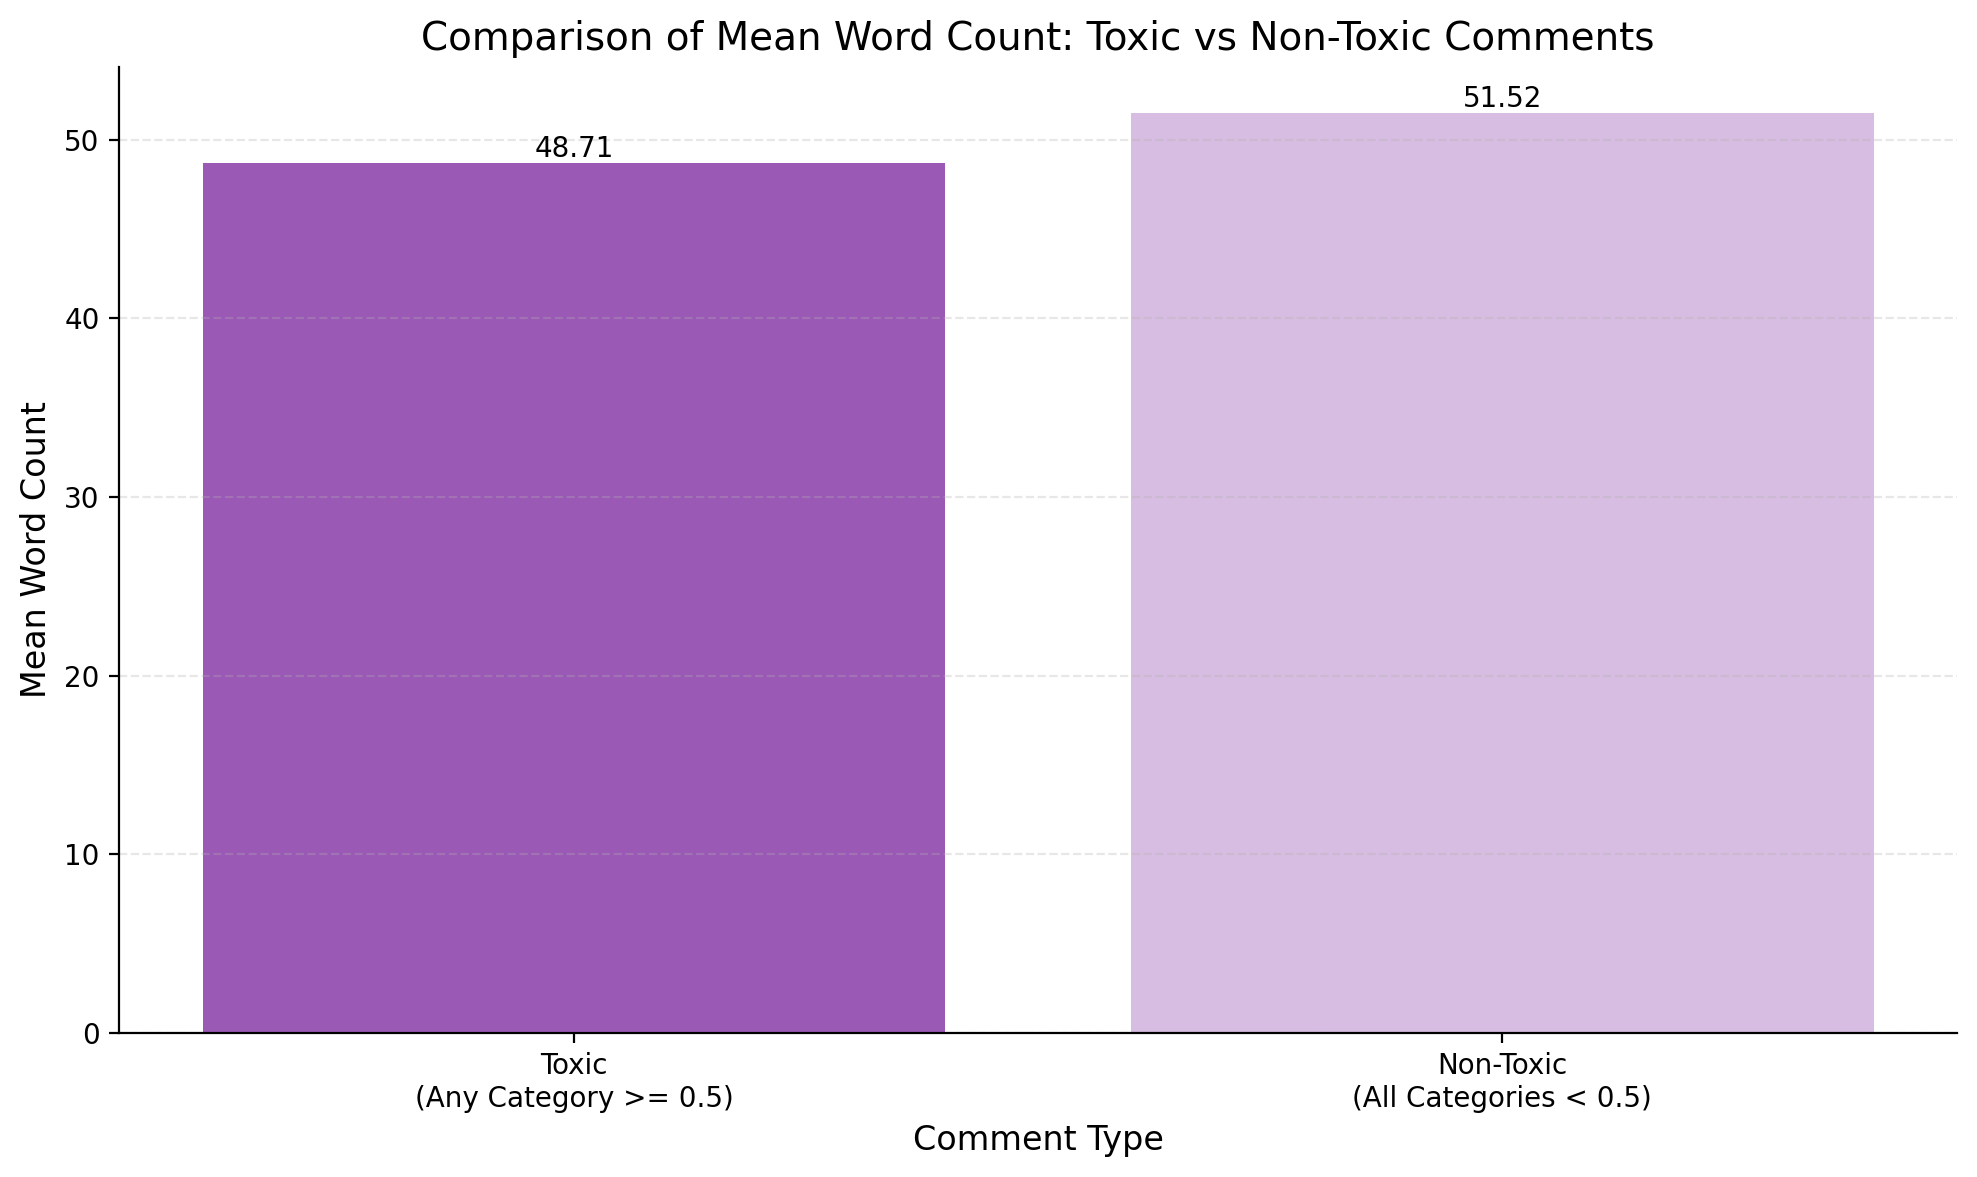

Mean word count for toxic comments: 48.71
Mean word count for non-toxic comments: 51.52


In [69]:
# Define purple palette
purple_palette = ['#9b59b6', '#D7BDE2']  # Dark purple for toxic, light purple for non-toxic

# Calculate mean word counts
mean_word_count_toxic = toxic_df['comment_text'].str.split().str.len().mean()
mean_word_count_non_toxic = non_toxic_df['comment_text'].str.split().str.len().mean()

mean_word_counts = [mean_word_count_toxic, mean_word_count_non_toxic]
labels = ['Toxic\n(Any Category >= 0.5)', 'Non-Toxic\n(All Categories < 0.5)']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, mean_word_counts, color=purple_palette)

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Customize the plot
plt.ylabel('Mean Word Count', fontsize=12)
plt.xlabel('Comment Type', fontsize=12)
plt.title('Comparison of Mean Word Count: Toxic vs Non-Toxic Comments', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the exact values
print(f"Mean word count for toxic comments: {mean_word_count_toxic:.2f}")
print(f"Mean word count for non-toxic comments: {mean_word_count_non_toxic:.2f}")

> getting tf-idf values

In [70]:
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
transformed_corpus = vectorizer.fit_transform(df['lemmatized_text'])

# Get feature names and their TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = transformed_corpus.sum(axis=0).A1

# Create a dictionary of words and their TF-IDF scores
word_scores = dict(zip(feature_names, tfidf_scores))

# TOXIC DF
vectorizer = TfidfVectorizer(stop_words='english')

transformed_corpus_toxic = vectorizer.fit_transform(toxic_df['comment_text'])

# Get feature names and their TF-IDF scores
feature_names_toxic = vectorizer.get_feature_names_out()
tfidf_scores_toxic = transformed_corpus_toxic.sum(axis=0).A1

# Create a dictionary of words and their TF-IDF scores
word_scores_toxic = dict(zip(feature_names_toxic, tfidf_scores_toxic))

# NON TOXIC DF
vectorizer = TfidfVectorizer(stop_words='english')

transformed_corpus_non_toxic = vectorizer.fit_transform(non_toxic_df['comment_text'])

# Get feature names and their TF-IDF scores
feature_names_non_toxic = vectorizer.get_feature_names_out()
tfidf_scores_non_toxic = transformed_corpus_non_toxic.sum(axis=0).A1

# Create a dictionary of words and their TF-IDF scores
word_scores_non_toxic = dict(zip(feature_names_non_toxic, tfidf_scores_non_toxic))

> plotting a wordcloud based on the tf-idf values

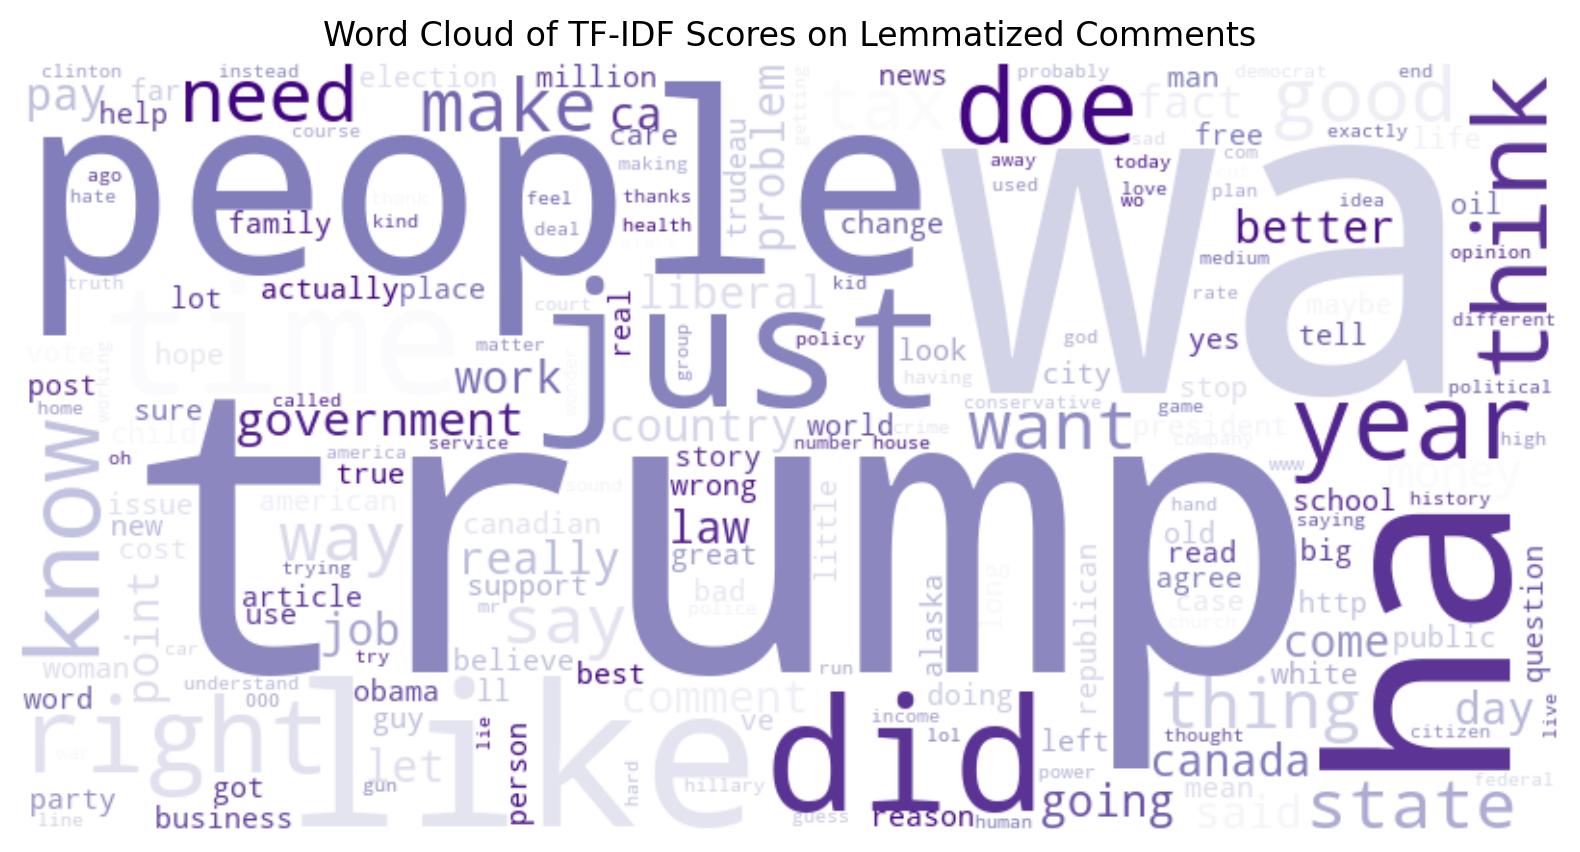

In [91]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples_r').generate_from_frequencies(word_scores)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores on Lemmatized Comments')
plt.show()

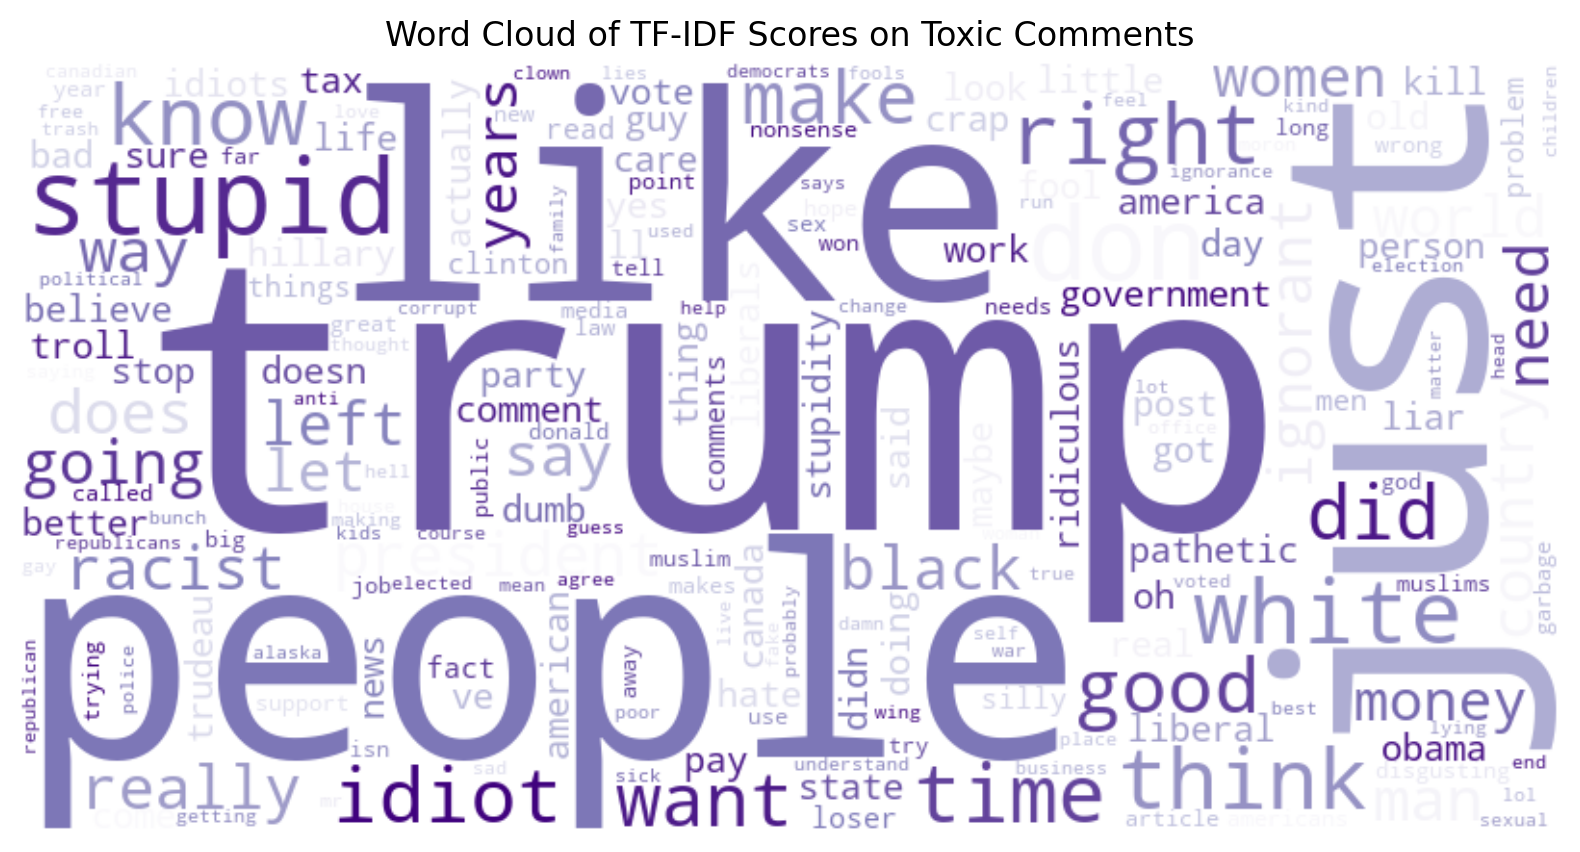

In [89]:
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate_from_frequencies(word_scores_toxic)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores on Toxic Comments')
plt.show()

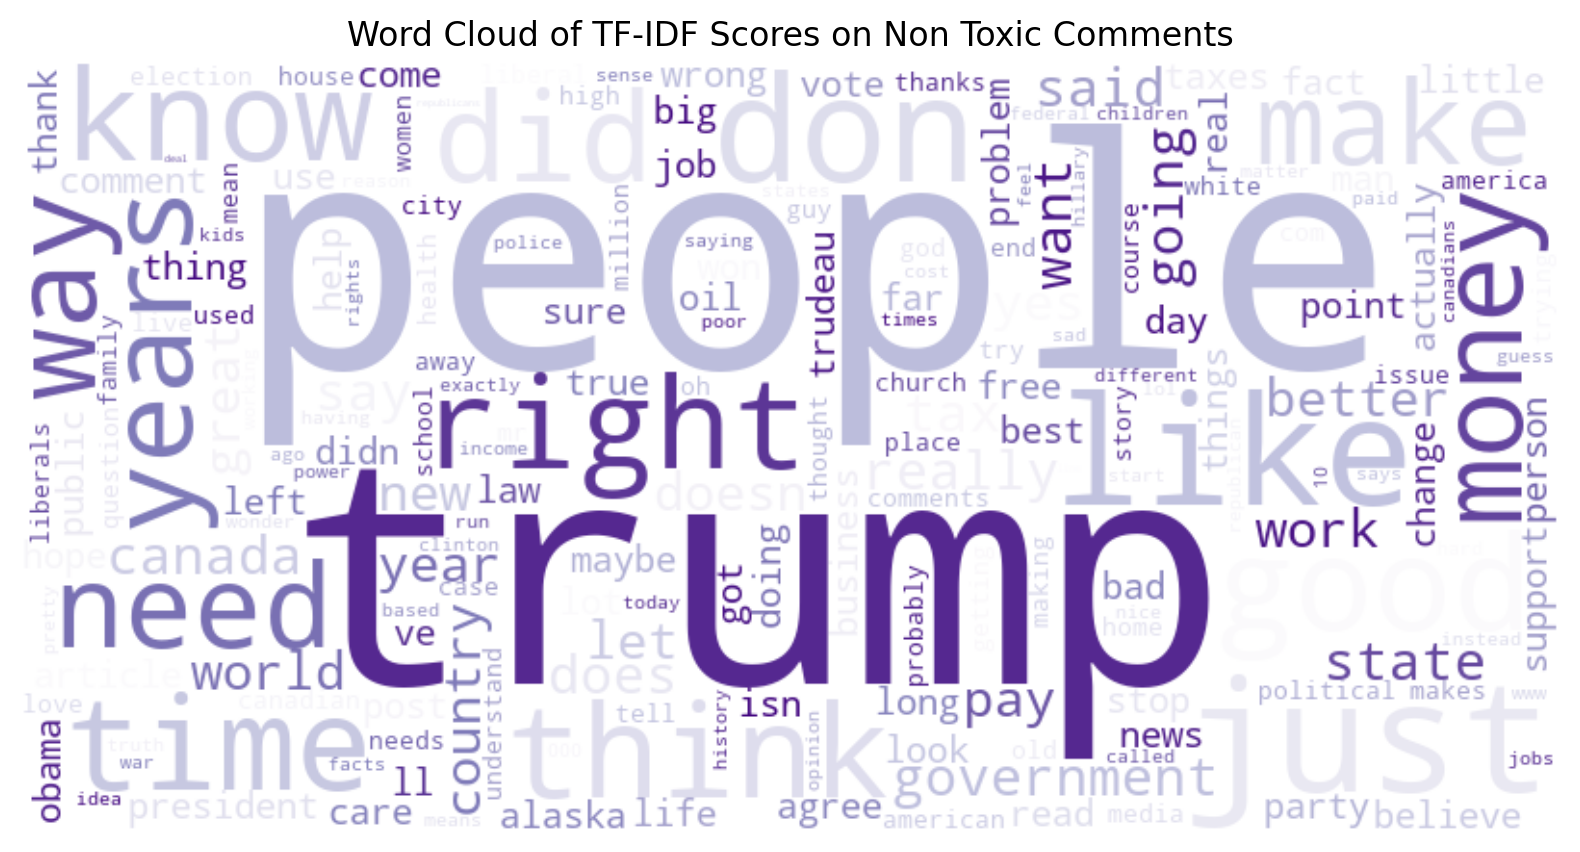

In [88]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples').generate_from_frequencies(word_scores_non_toxic)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Scores on Non Toxic Comments')
plt.show()

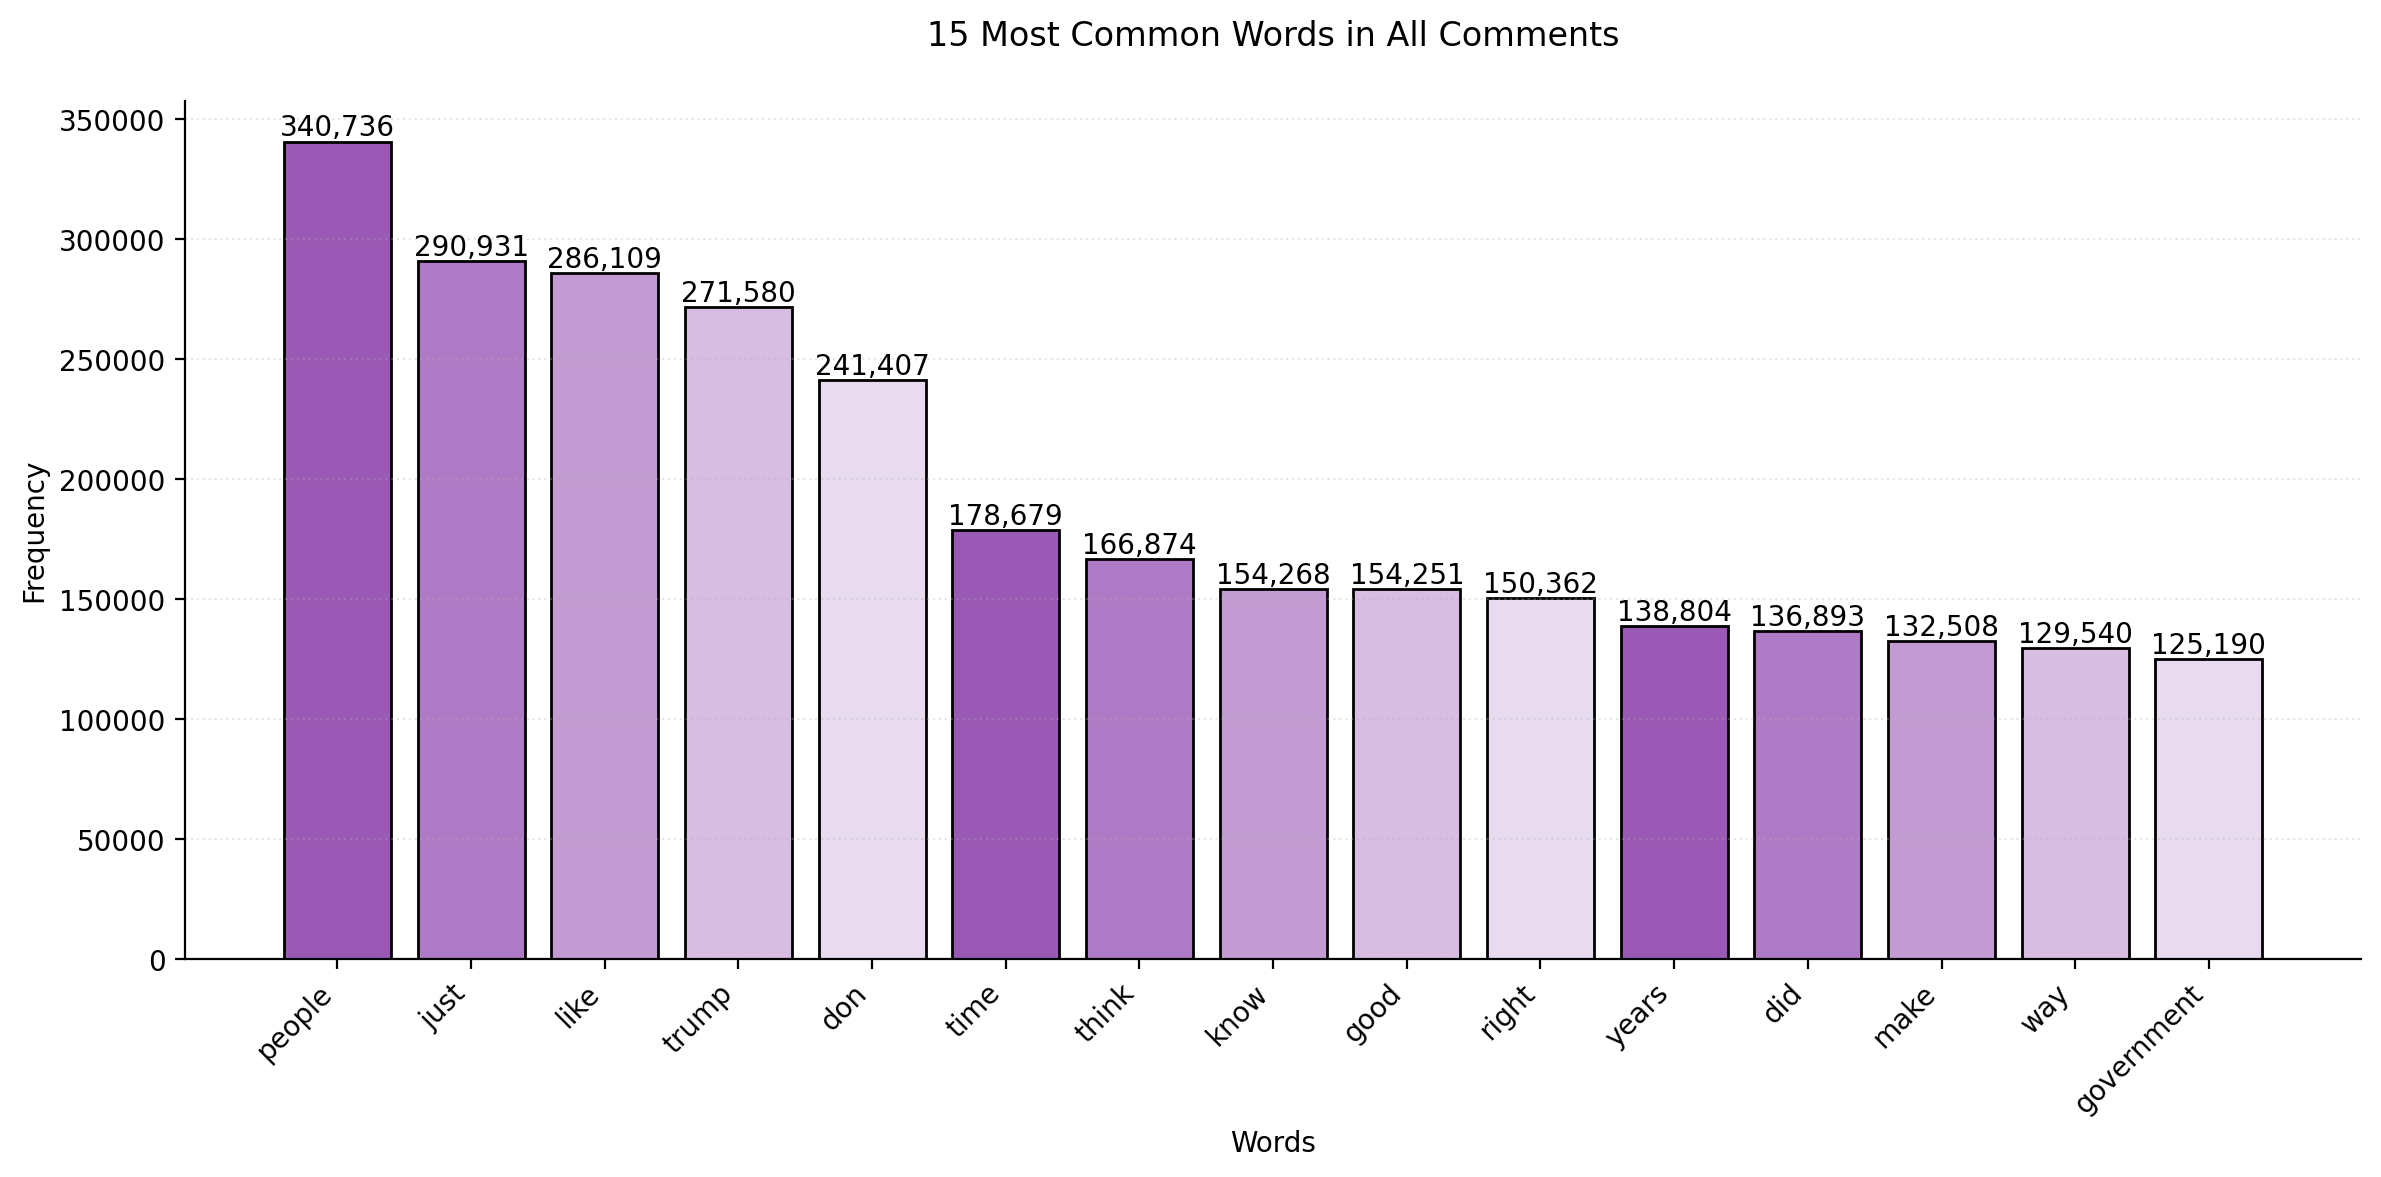

In [75]:
word_freqs, fig1 = plot_top_words(df['comment_text'], 
                                 n=15, 
                                 title='15 Most Common Words in All Comments')
plt.show()

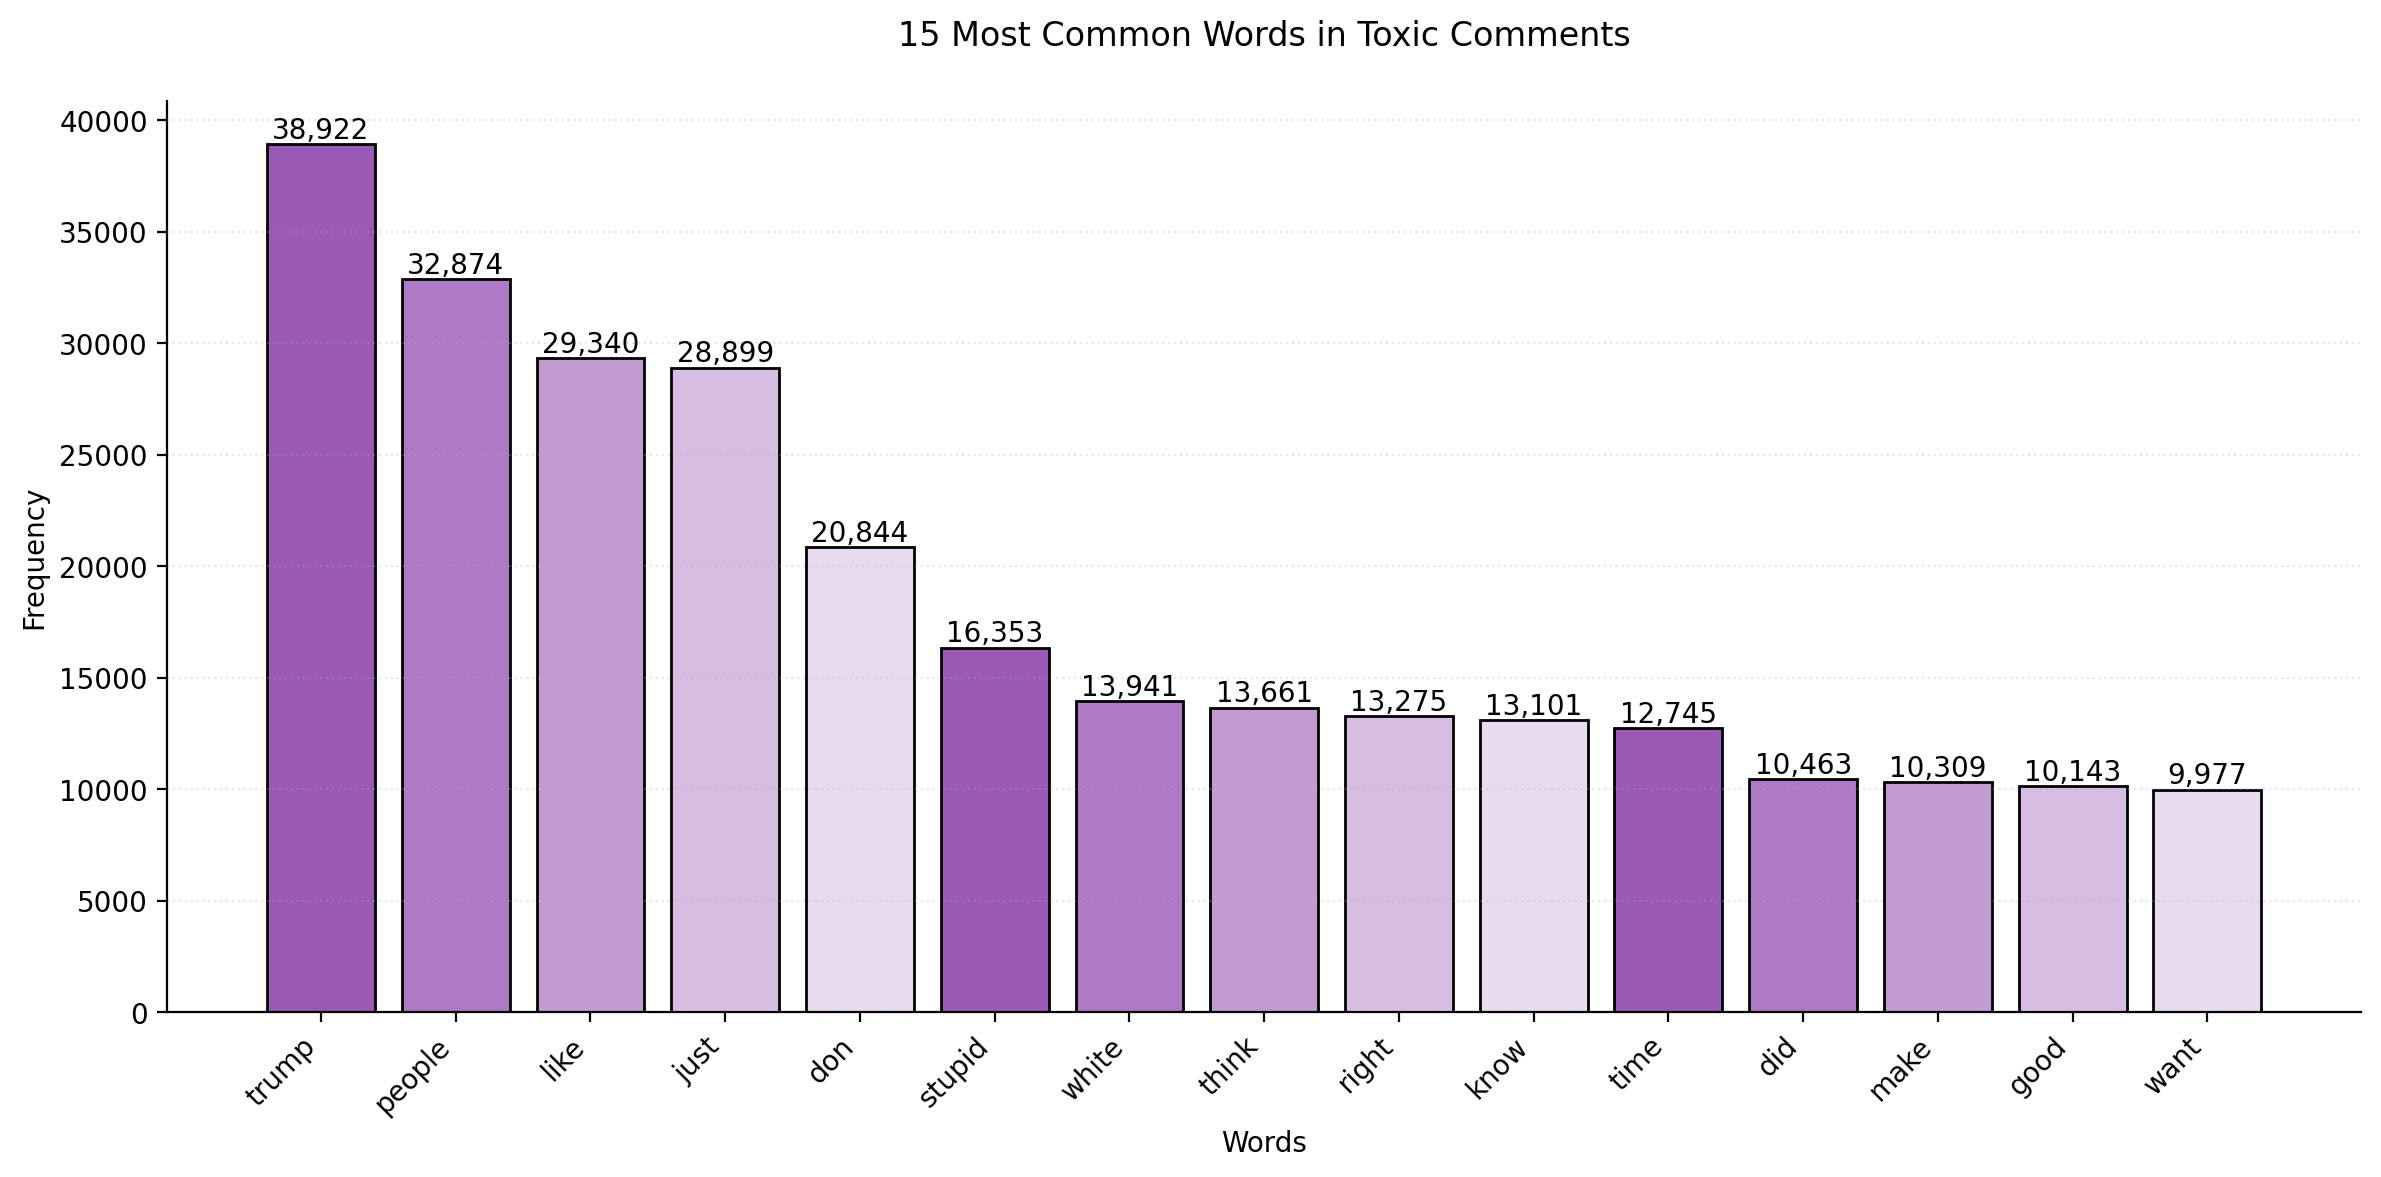

In [76]:
word_freqs, fig1 = plot_top_words(toxic_df['comment_text'], 
                                 n=15, 
                                 title='15 Most Common Words in Toxic Comments')
plt.show()

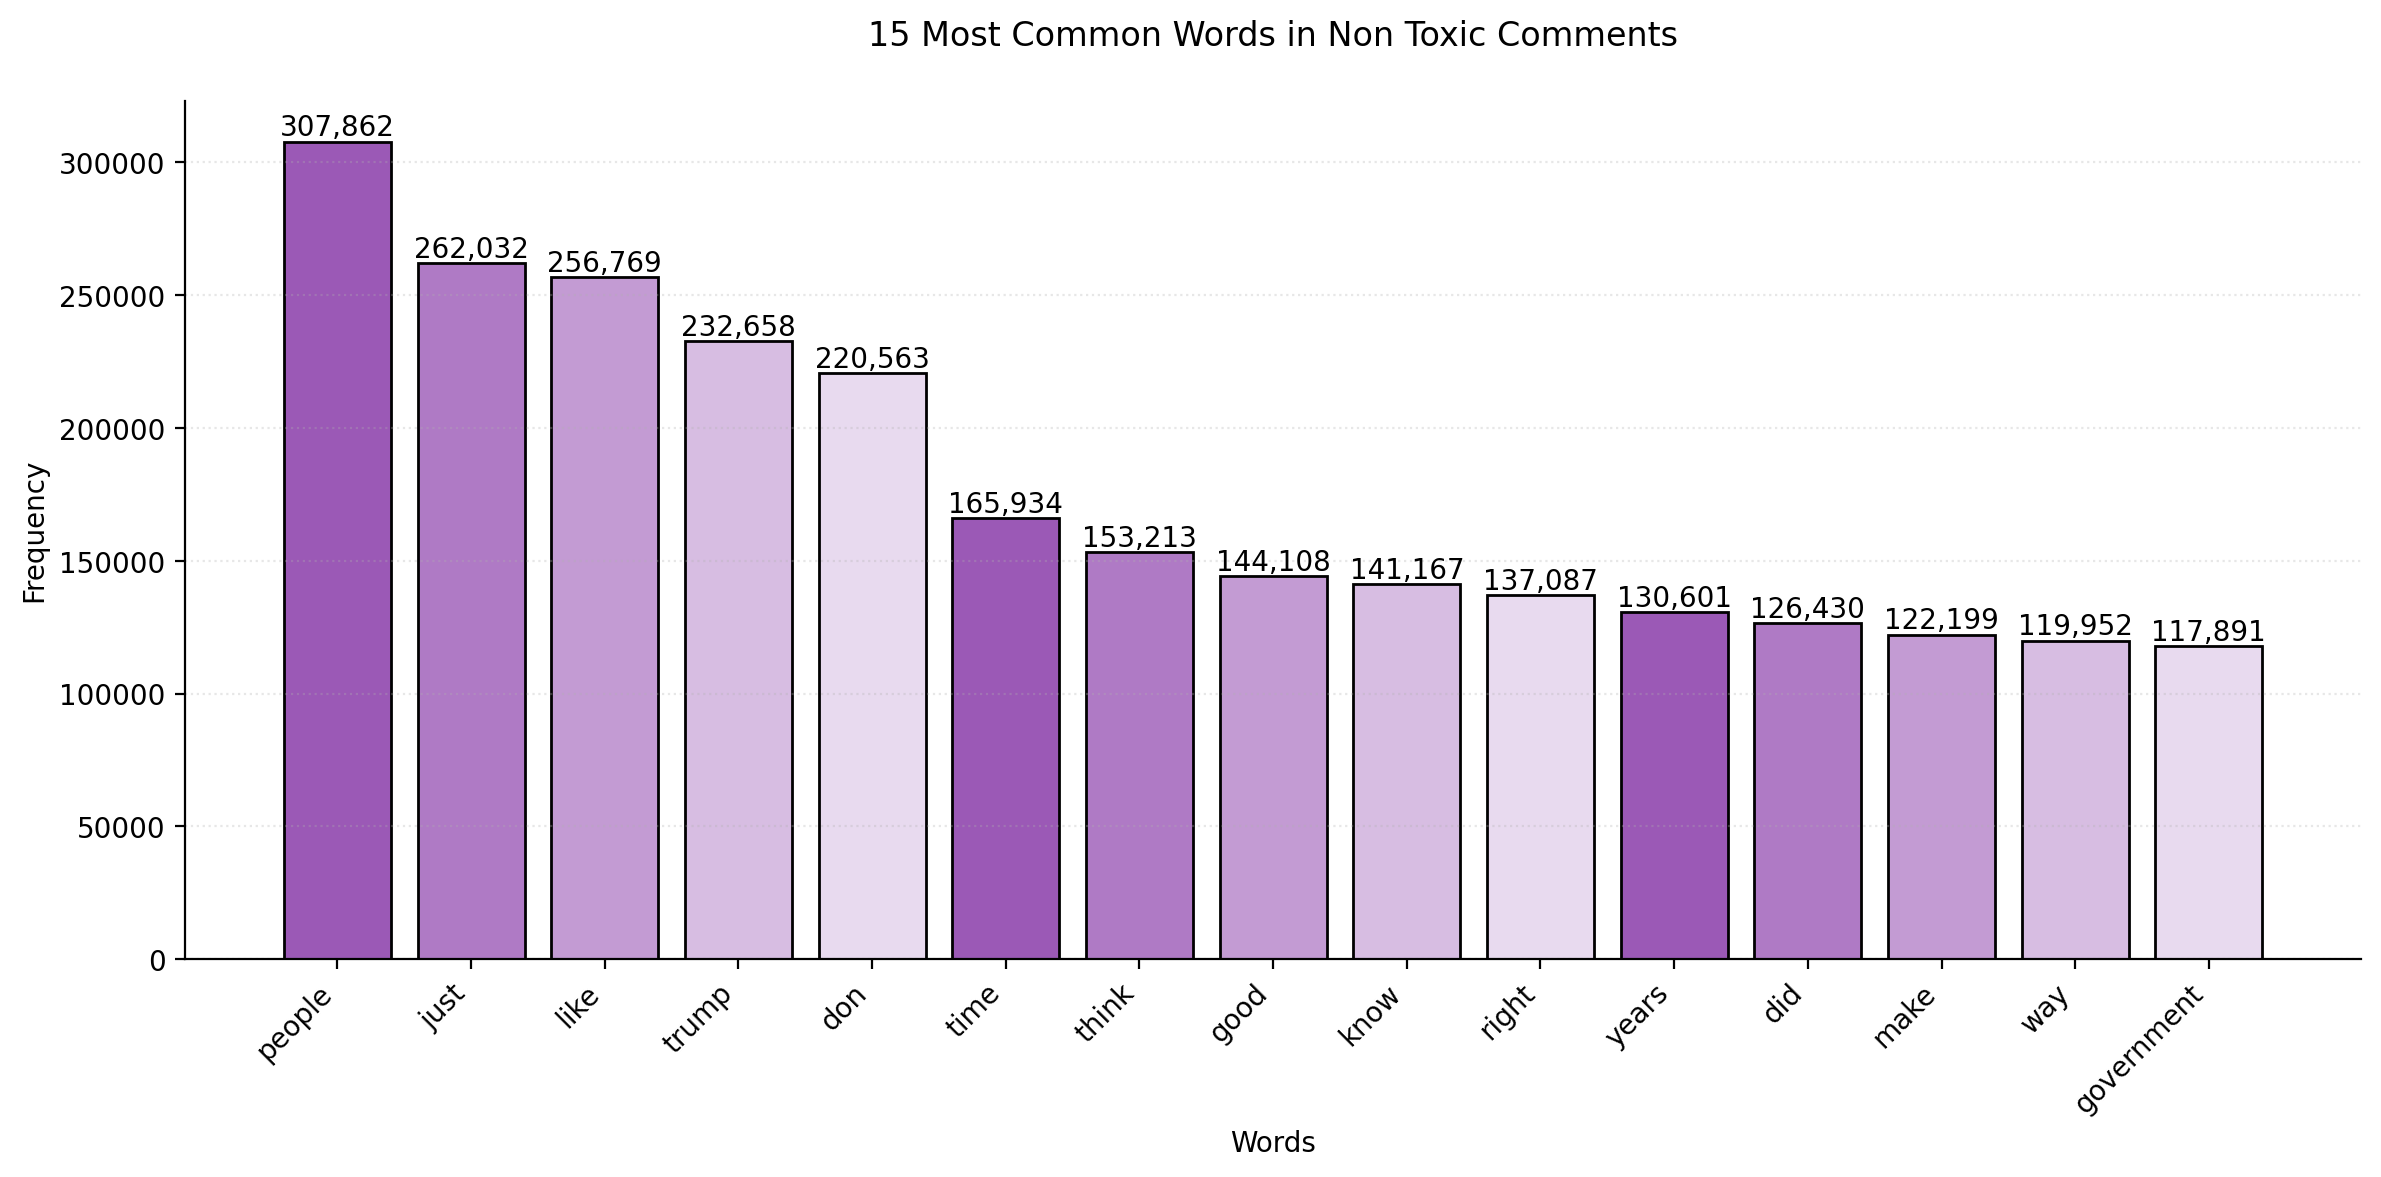

In [78]:
word_freqs, fig1 = plot_top_words(non_toxic_df['comment_text'], 
                                 n=15, 
                                 title='15 Most Common Words in Non Toxic Comments')
plt.show()

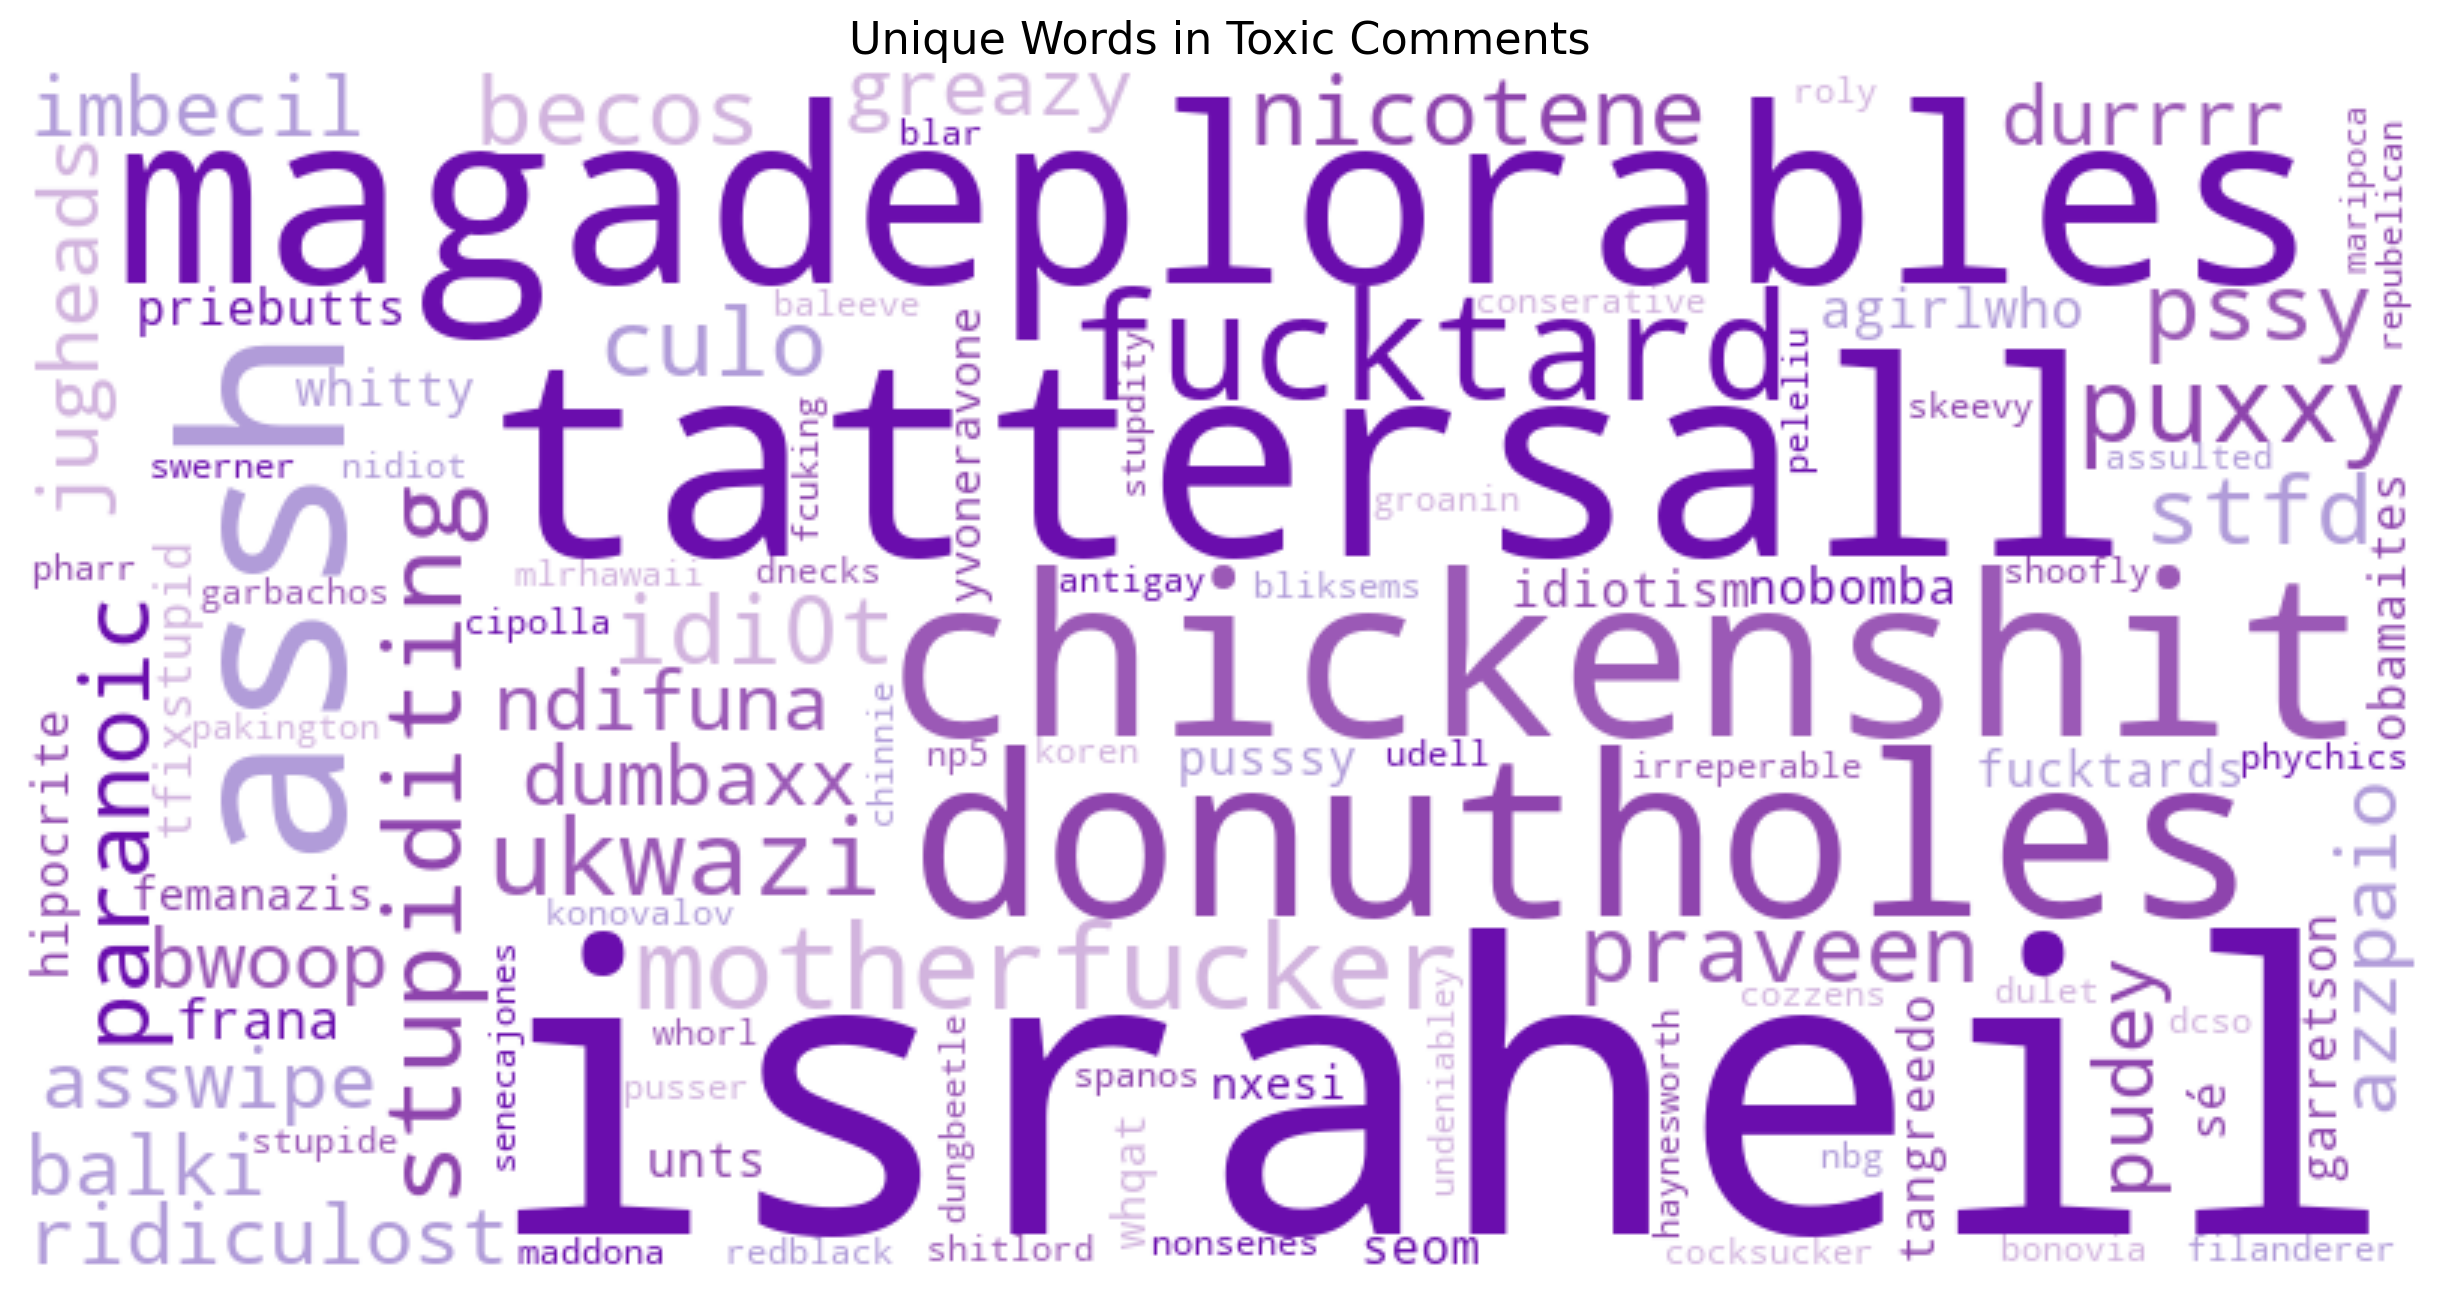

In [92]:
unique_freq = unique_wordcloud(toxic_df['comment_text'], non_toxic_df['comment_text'], 
                                title="Unique Words in Toxic Comments", purple_palette=dark_purple_palette)

Corpus 1 size: 164435
Corpus 2 size: 1835081
Total words in corpus 1: 3671232
Total words in corpus 2: 42653197
Number of words meeting criteria: 9568


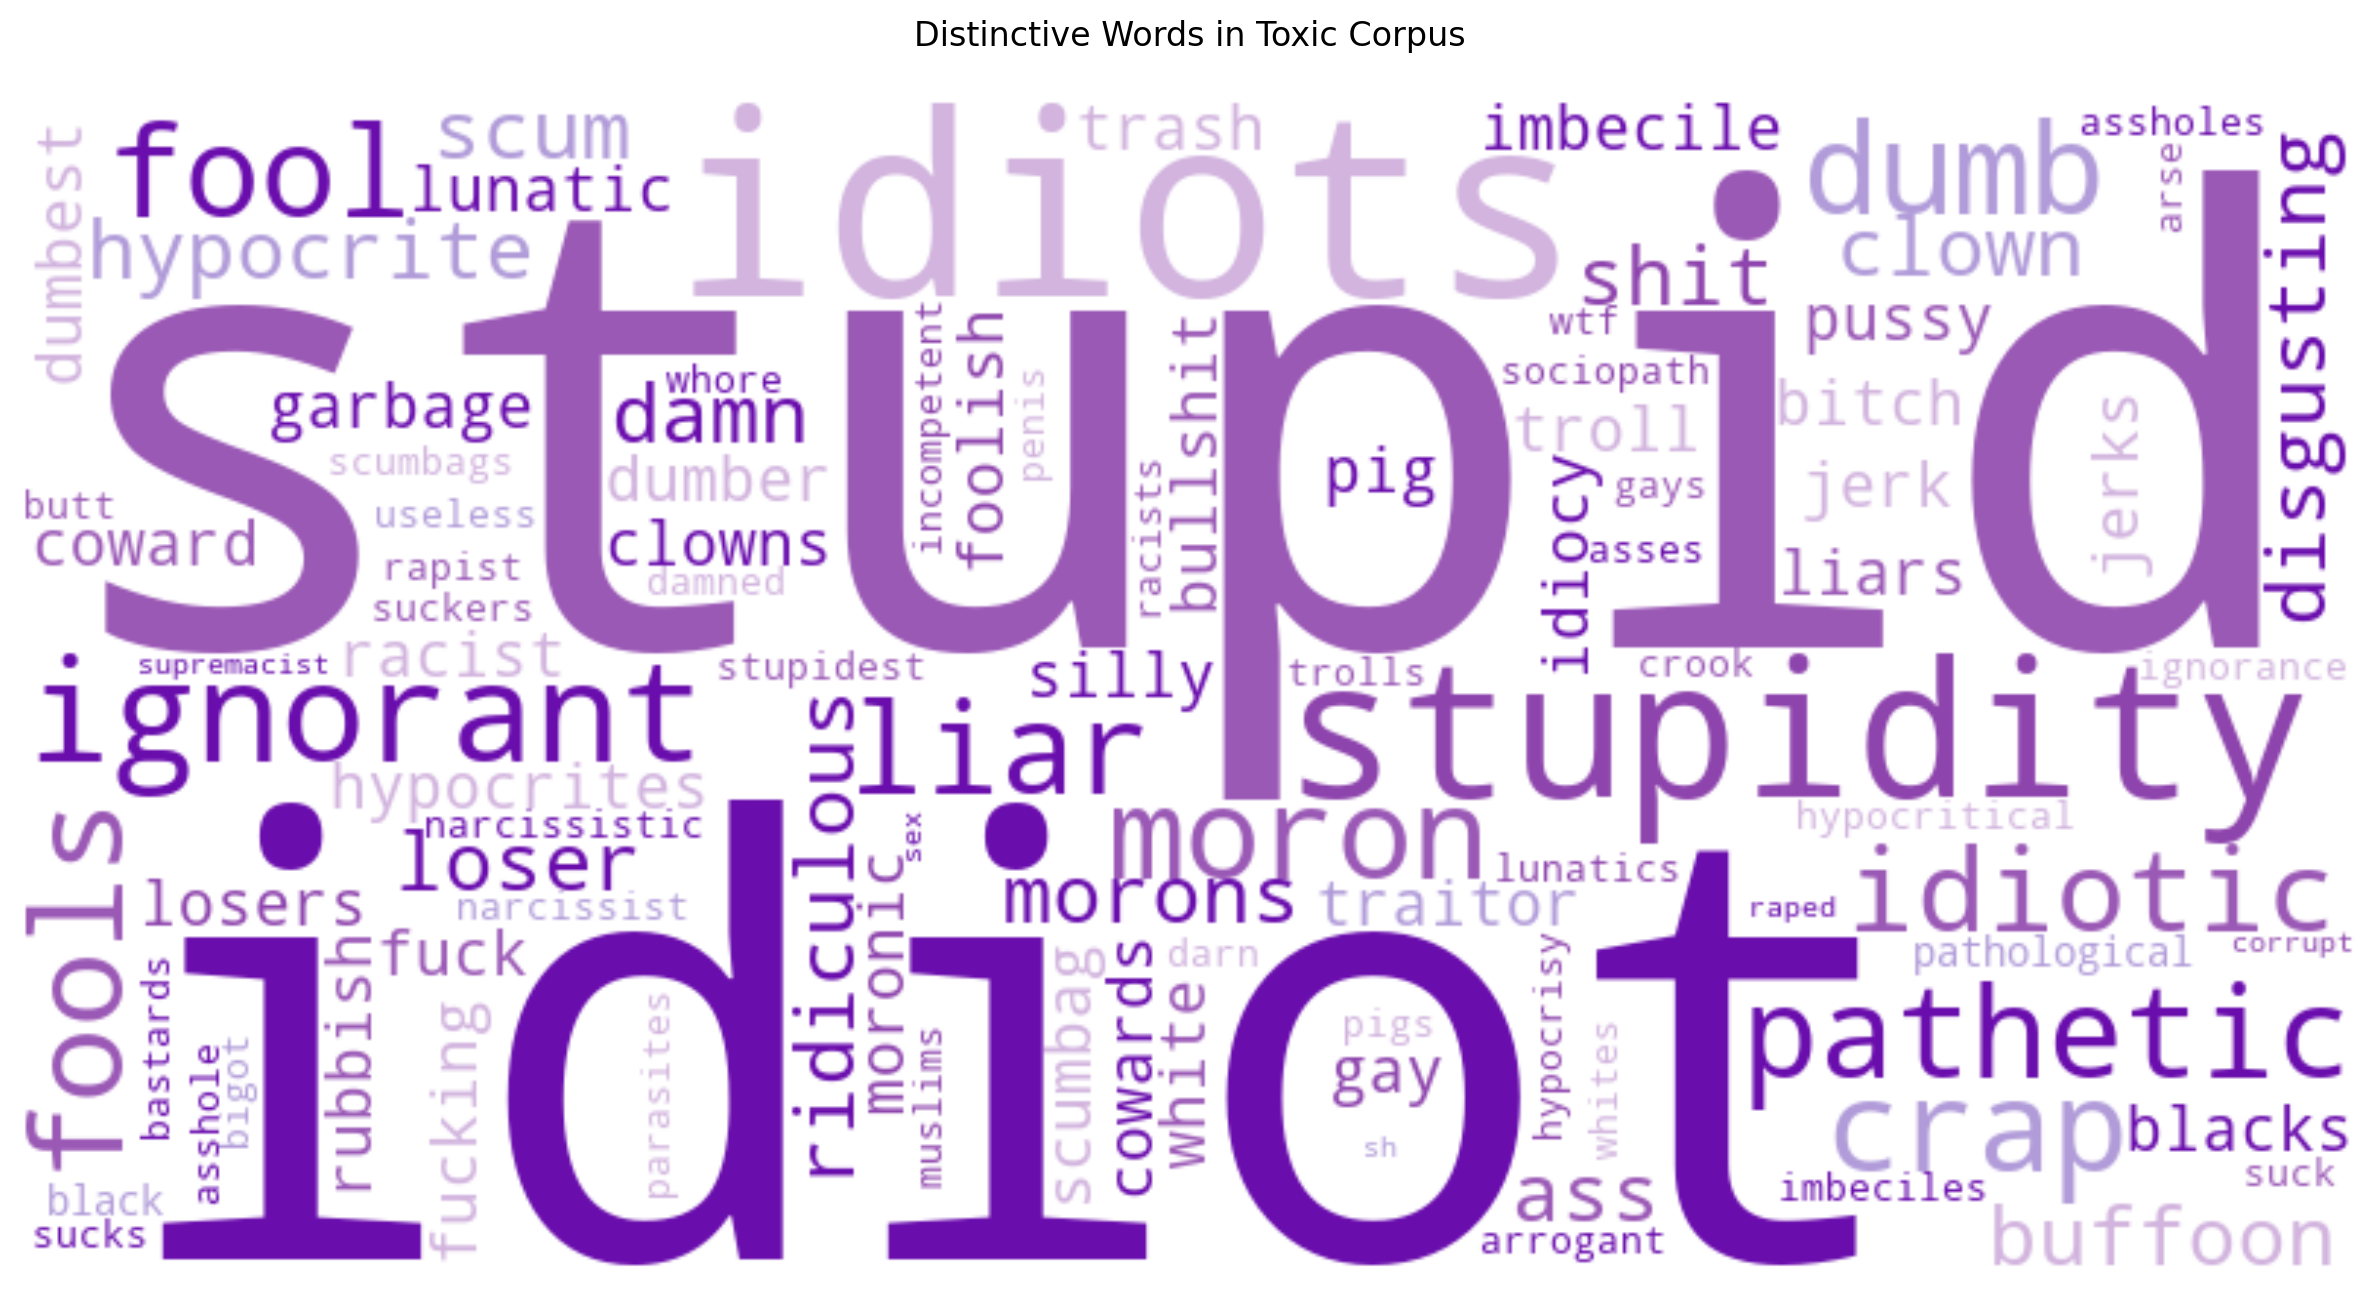

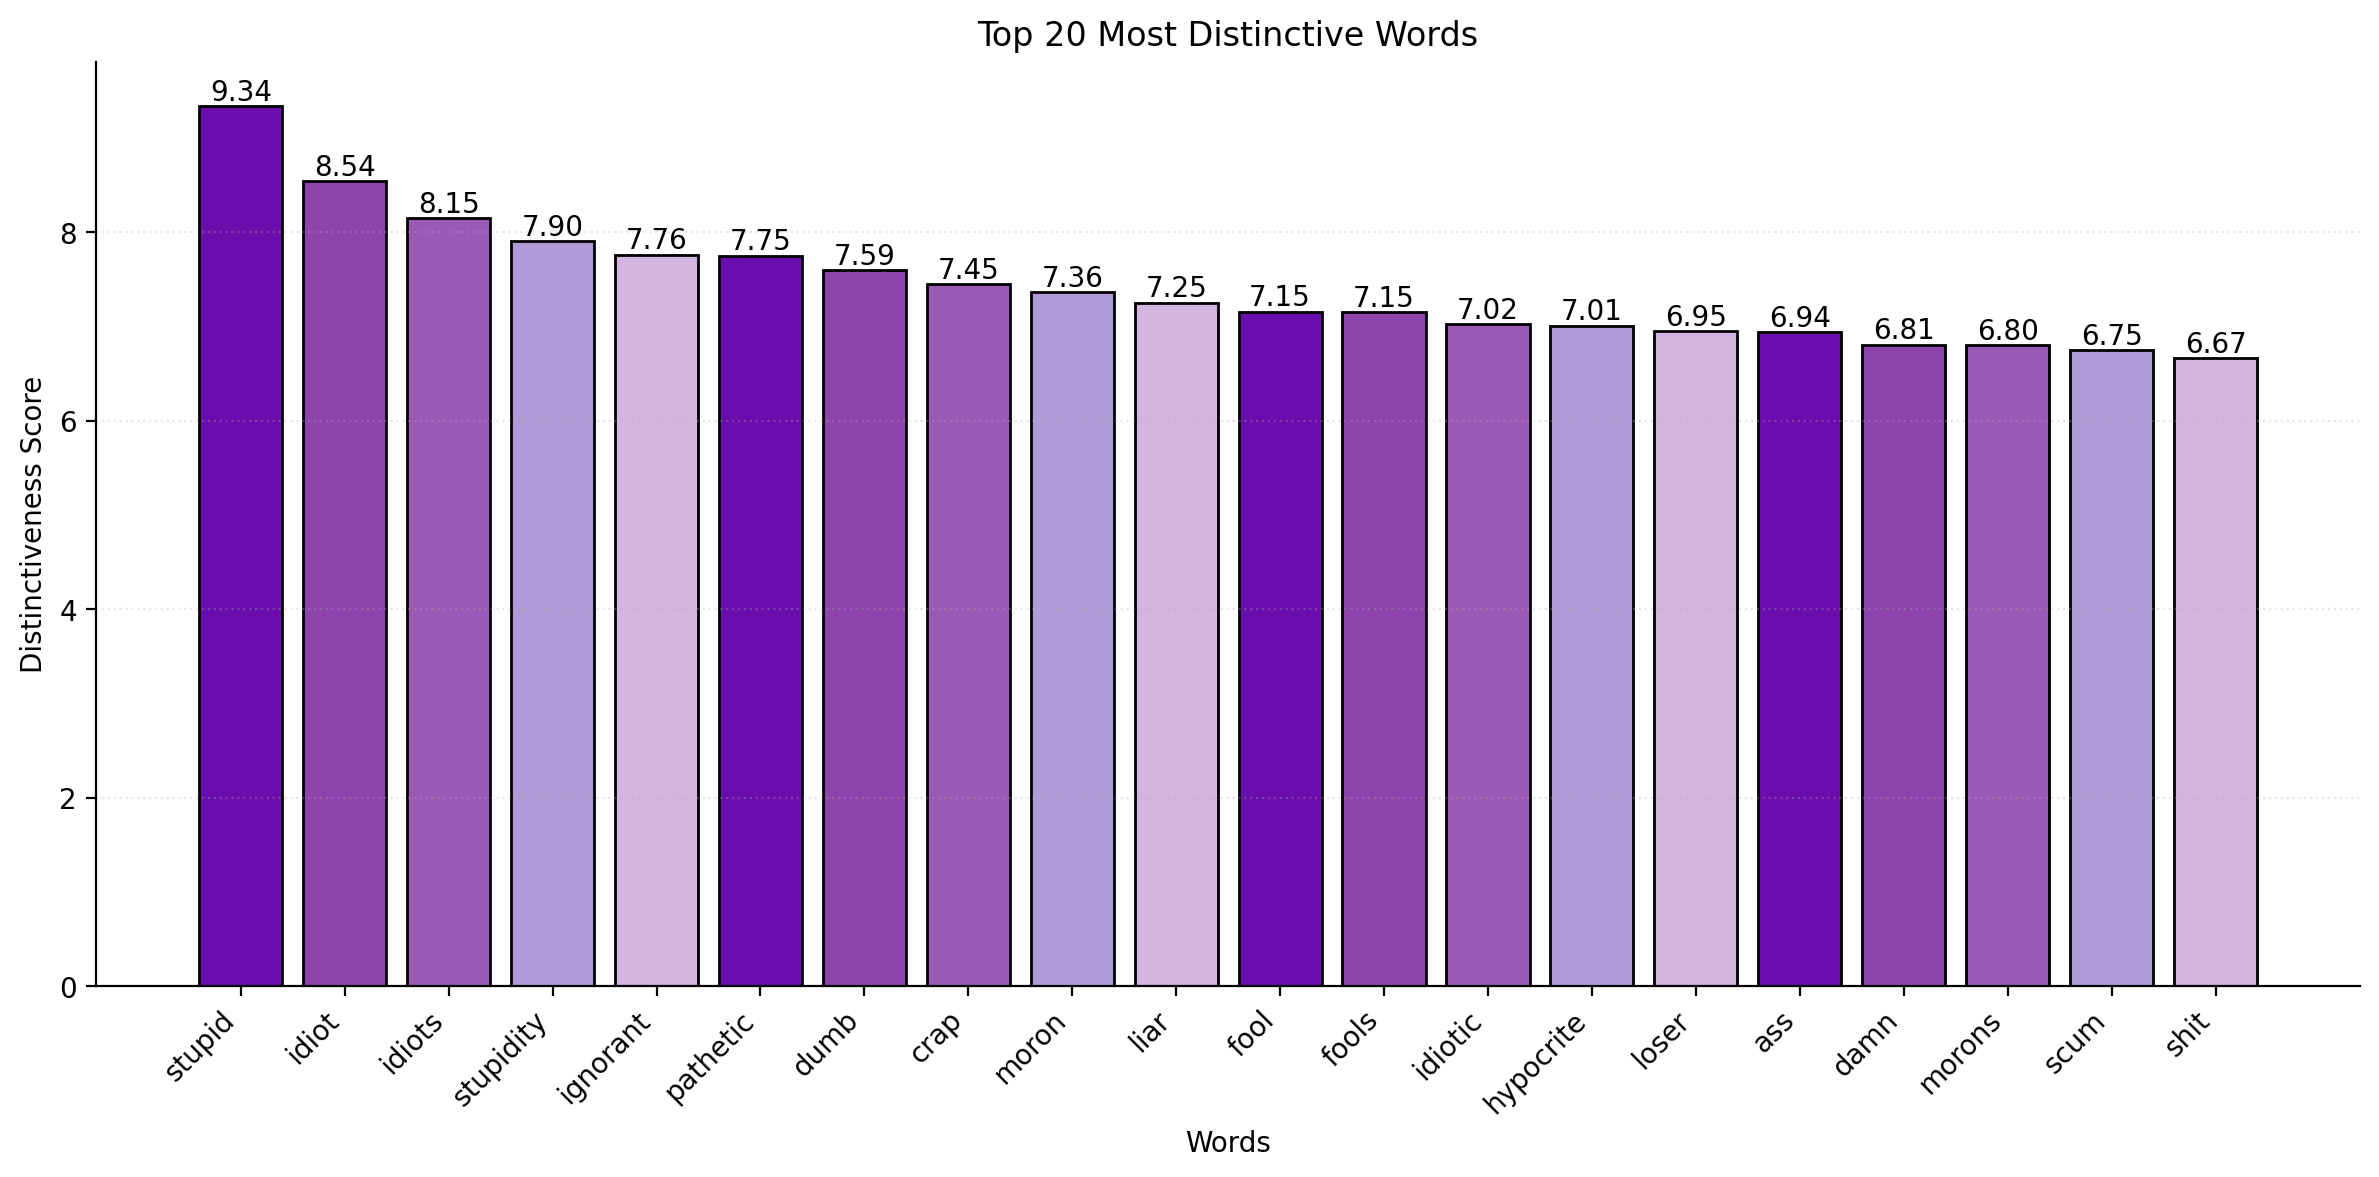


Top 20 distinctive words with frequencies:
stupid               Corpus1: 16353 (0.004454) | Corpus2:  3644 (0.000085)
idiot                Corpus1:  5938 (0.001617) | Corpus2:   615 (0.000014)
idiots               Corpus1:  4075 (0.001110) | Corpus2:   480 (0.000011)
stupidity            Corpus1:  3561 (0.000970) | Corpus2:   705 (0.000017)
ignorant             Corpus1:  5978 (0.001628) | Corpus2:  3952 (0.000093)
pathetic             Corpus1:  4377 (0.001192) | Corpus2:  2005 (0.000047)
dumb                 Corpus1:  4158 (0.001133) | Corpus2:  2243 (0.000053)
crap                 Corpus1:  3567 (0.000972) | Corpus2:  1947 (0.000046)
moron                Corpus1:  1948 (0.000531) | Corpus2:   325 (0.000008)
liar                 Corpus1:  3666 (0.000999) | Corpus2:  2635 (0.000062)
fool                 Corpus1:  3407 (0.000928) | Corpus2:  2536 (0.000059)
fools                Corpus1:  2331 (0.000635) | Corpus2:  1106 (0.000026)
idiotic              Corpus1:  1540 (0.000419) | Corpus2

In [83]:
distinctive_words = compare_corpora(toxic_df['comment_text'], 
                                  non_toxic_df['comment_text'],
                                  min_freq=10,
                                  min_diff_ratio=0.00001,
                                  purple_palette=dark_purple_palette)

### Anotator Analysis

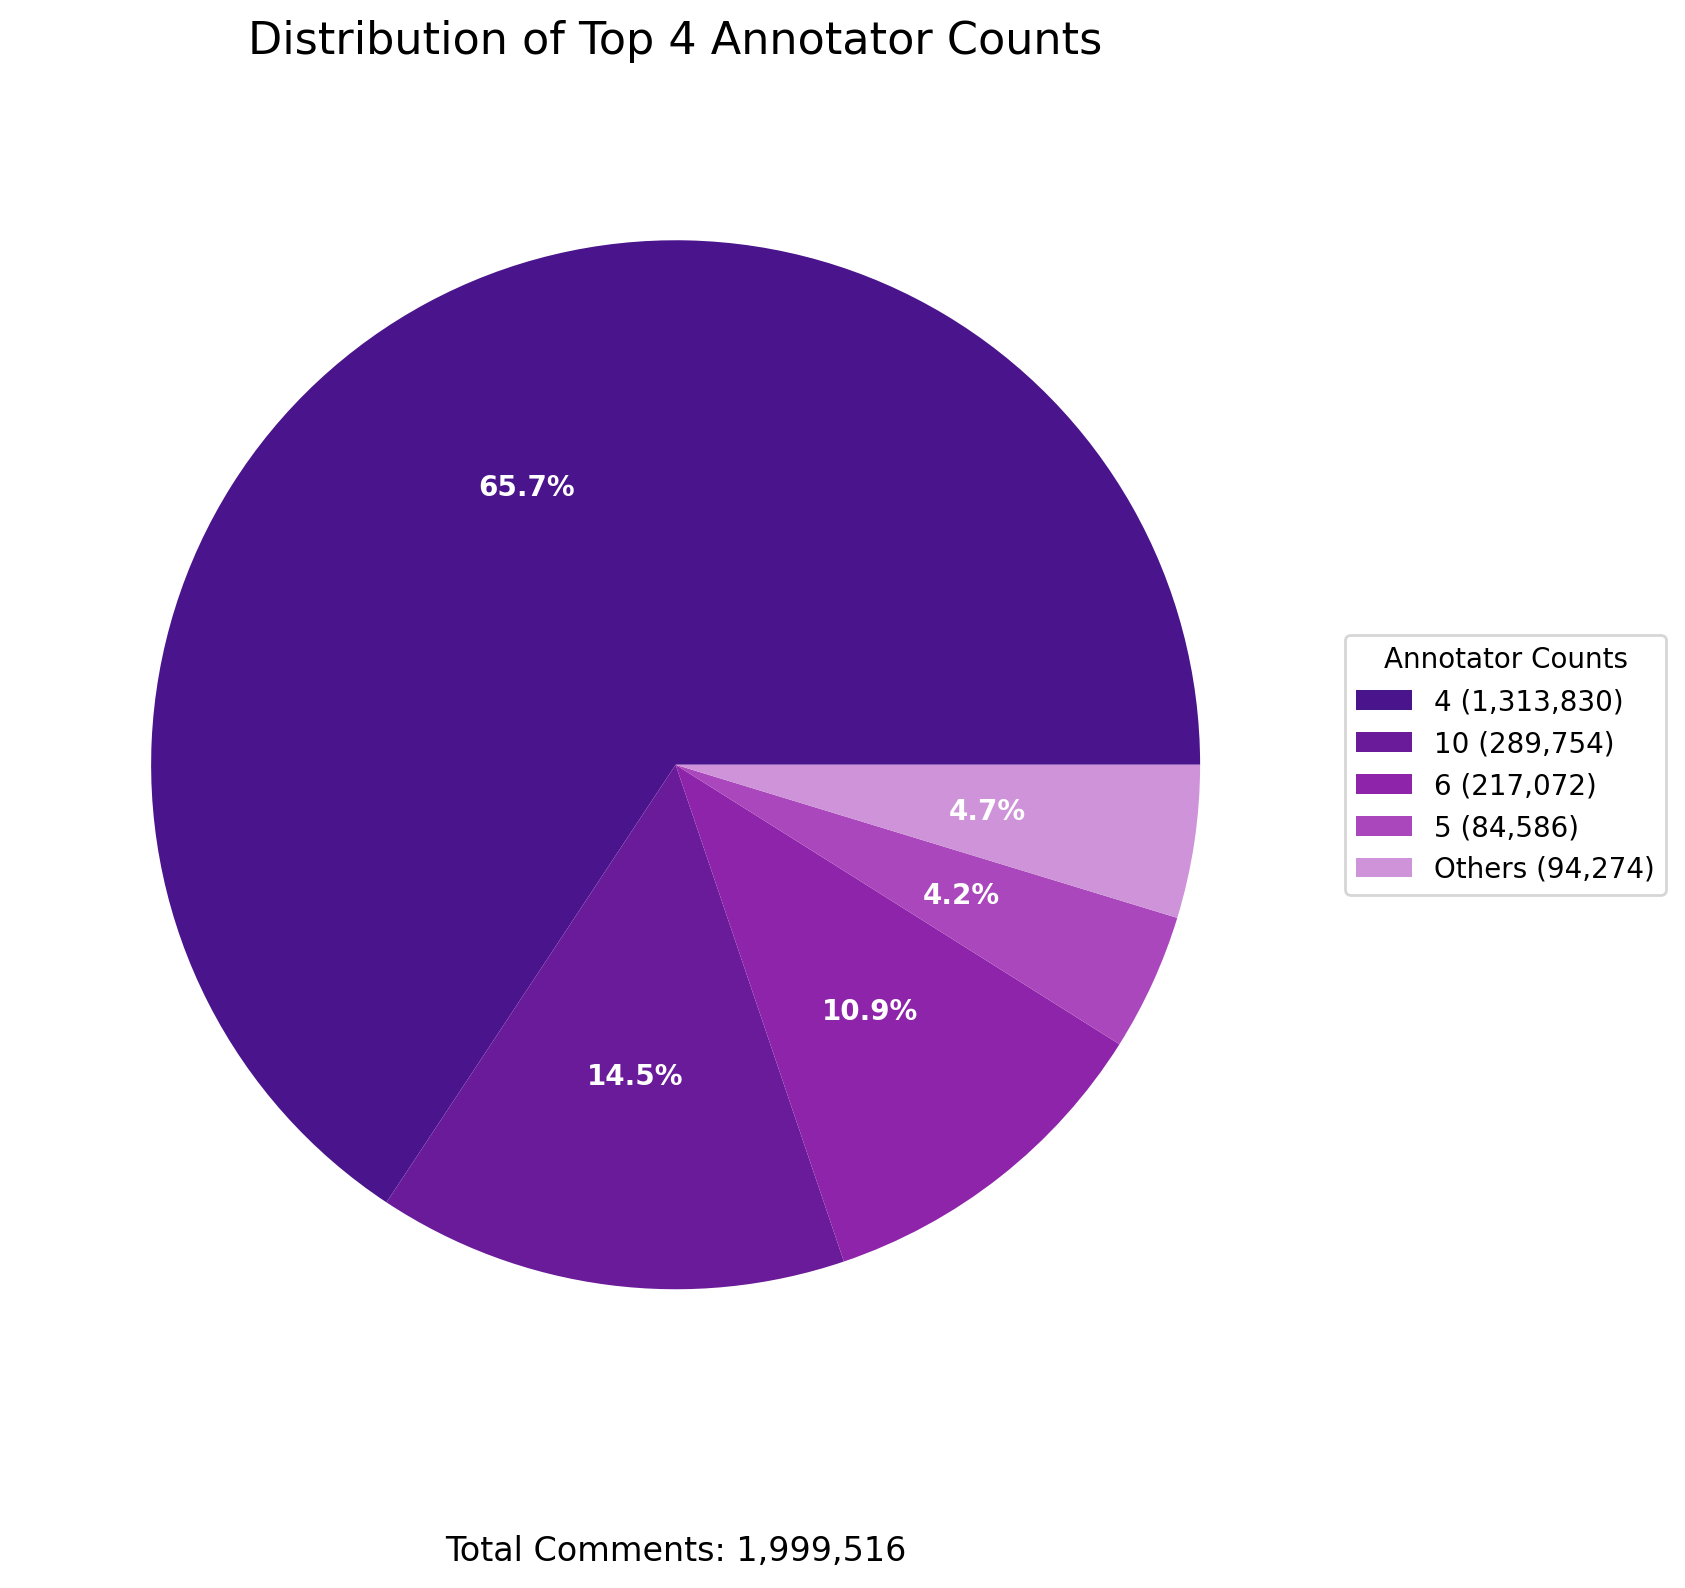

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

column='toxicity_annotator_count'
top_n=4
figsize=(10, 8)

# Get value counts
value_counts = df[column].value_counts()

# Get top N and 'Others'
top_values = value_counts.nlargest(top_n)
others = pd.Series({'Others': value_counts.sum() - top_values.sum()})

# Combine top values and 'Others'
plot_data = pd.concat([top_values, others])

# Create figure and axes
fig, ax = plt.subplots(figsize=figsize)

# Create pie chart with custom colors
wedges, texts, autotexts = ax.pie(plot_data.values, 
                                 labels=plot_data.index, 
                                 autopct='%1.1f%%',
                                 textprops=dict(color="w"),
                                 colors=vibrant_purple_palette)

# Enhance the appearance
plt.setp(autotexts, size=10, weight="bold")

# Add legend
ax.legend(wedges, [f'{index} ({value:,})' for index, value in plot_data.items()],
         title="Annotator Counts",
         loc="center left",
         bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title(f'Distribution of Top {top_n} Annotator Counts', fontsize=16, pad=20)

# Add total comments info
total_comments = df[column].count()
plt.text(0.5, -0.1, f'Total Comments: {total_comments:,}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()

### Label Analysis

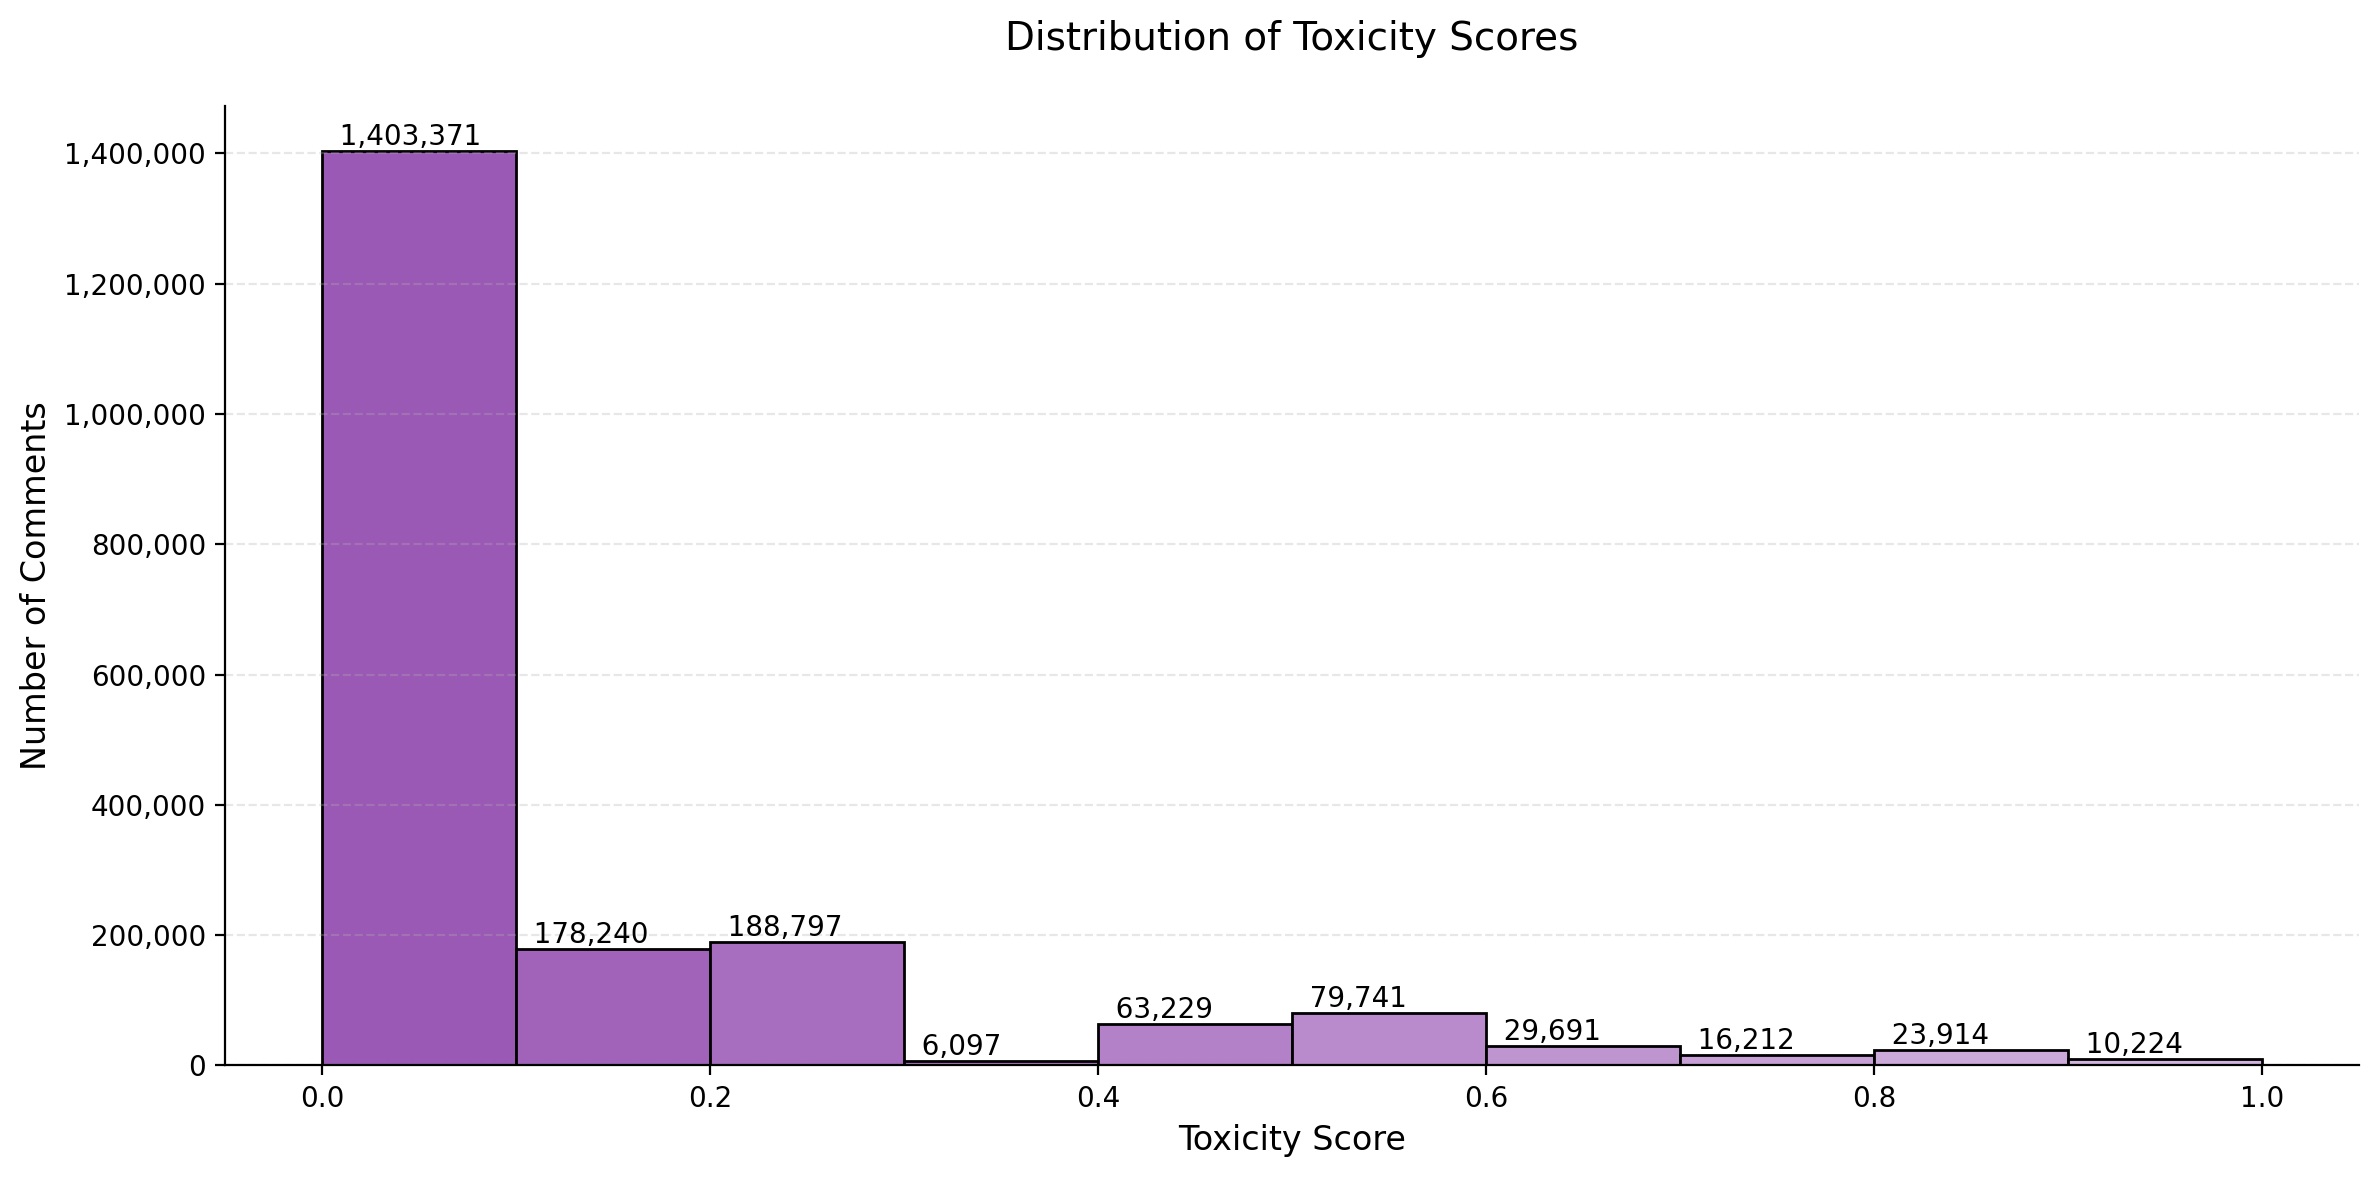

In [101]:
# Create a custom colormap from purple palette
n_bins = 10  # number of bins in histogram
custom_purple = LinearSegmentedColormap.from_list("custom_purple", purple_palette)
colors = [custom_purple(i/n_bins) for i in range(n_bins)]

plt.figure(figsize=(12, 6))

# Create histogram with custom colors
toxicity_scores = df["toxicity"]
counts, bins, patches = plt.hist(toxicity_scores, 
                                bins=np.arange(0, 1.1, 0.1), 
                                edgecolor='black',
                                linewidth=1)

# Set the color for each bar
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.xlabel('Toxicity Score', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.title('Distribution of Toxicity Scores', fontsize=14, pad=20)

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(bins[i], count, f'  {int(count):,}', 
             ha='left', va='bottom')

# Customize grid
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

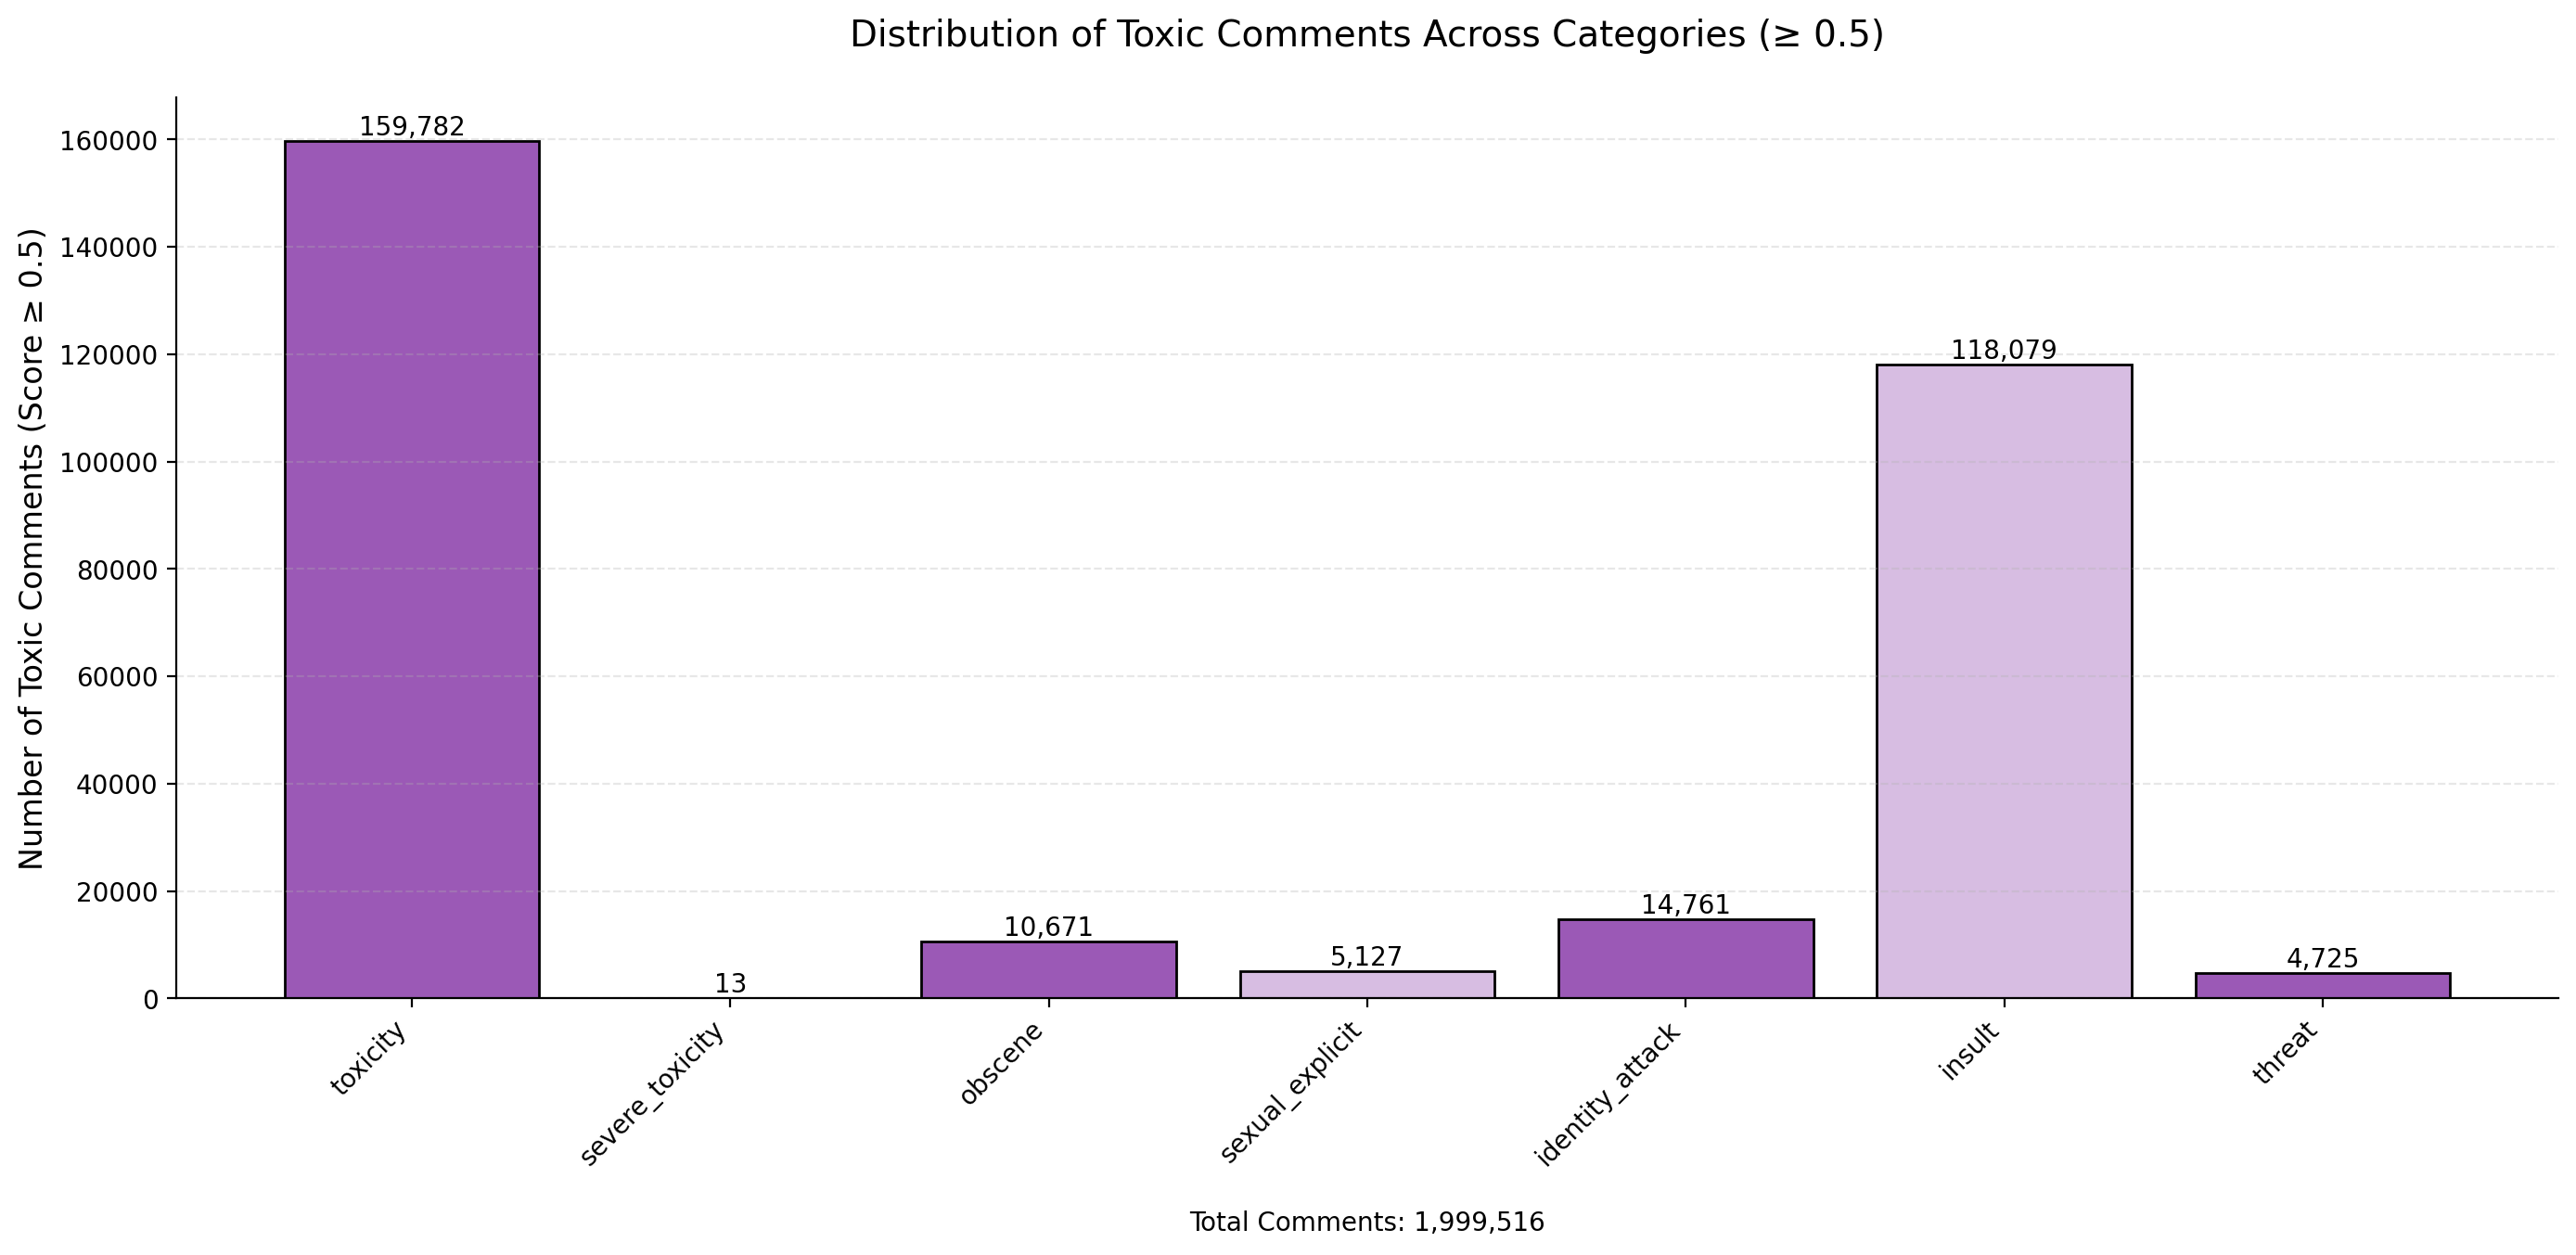

Category Counts and Percentages:
toxicity: 159,782 (7.99%)
severe_toxicity: 13 (0.00%)
obscene: 10,671 (0.53%)
sexual_explicit: 5,127 (0.26%)
identity_attack: 14,761 (0.74%)
insult: 118,079 (5.91%)
threat: 4,725 (0.24%)


In [95]:
categories = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
              'identity_attack', 'insult', 'threat']

toxic_counts = {}
for category in categories:
    toxic_counts[category] = (df[category] >= 0.5).sum()

# Create a color gradient
n_categories = len(categories)
colors = [purple_palette[i % len(purple_palette)] for i in range(n_categories)]

# Create bar plot
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(toxic_counts)), list(toxic_counts.values()), color=colors, edgecolor='black')

# Customize the plot
plt.xticks(range(len(toxic_counts)), categories, rotation=45, ha='right')
plt.ylabel('Number of Toxic Comments (Score ≥ 0.5)', fontsize=12)
plt.title('Distribution of Toxic Comments Across Categories (≥ 0.5)', fontsize=14, pad=20)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add total comments information
plt.text(0.5, -0.25, f'Total Comments: {total_comments:,}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Print the exact counts and percentages
print("Category Counts and Percentages:")
for category, count in toxic_counts.items():
    percentage = (count / total_comments) * 100
    print(f"{category}: {count:,} ({percentage:.2f}%)")

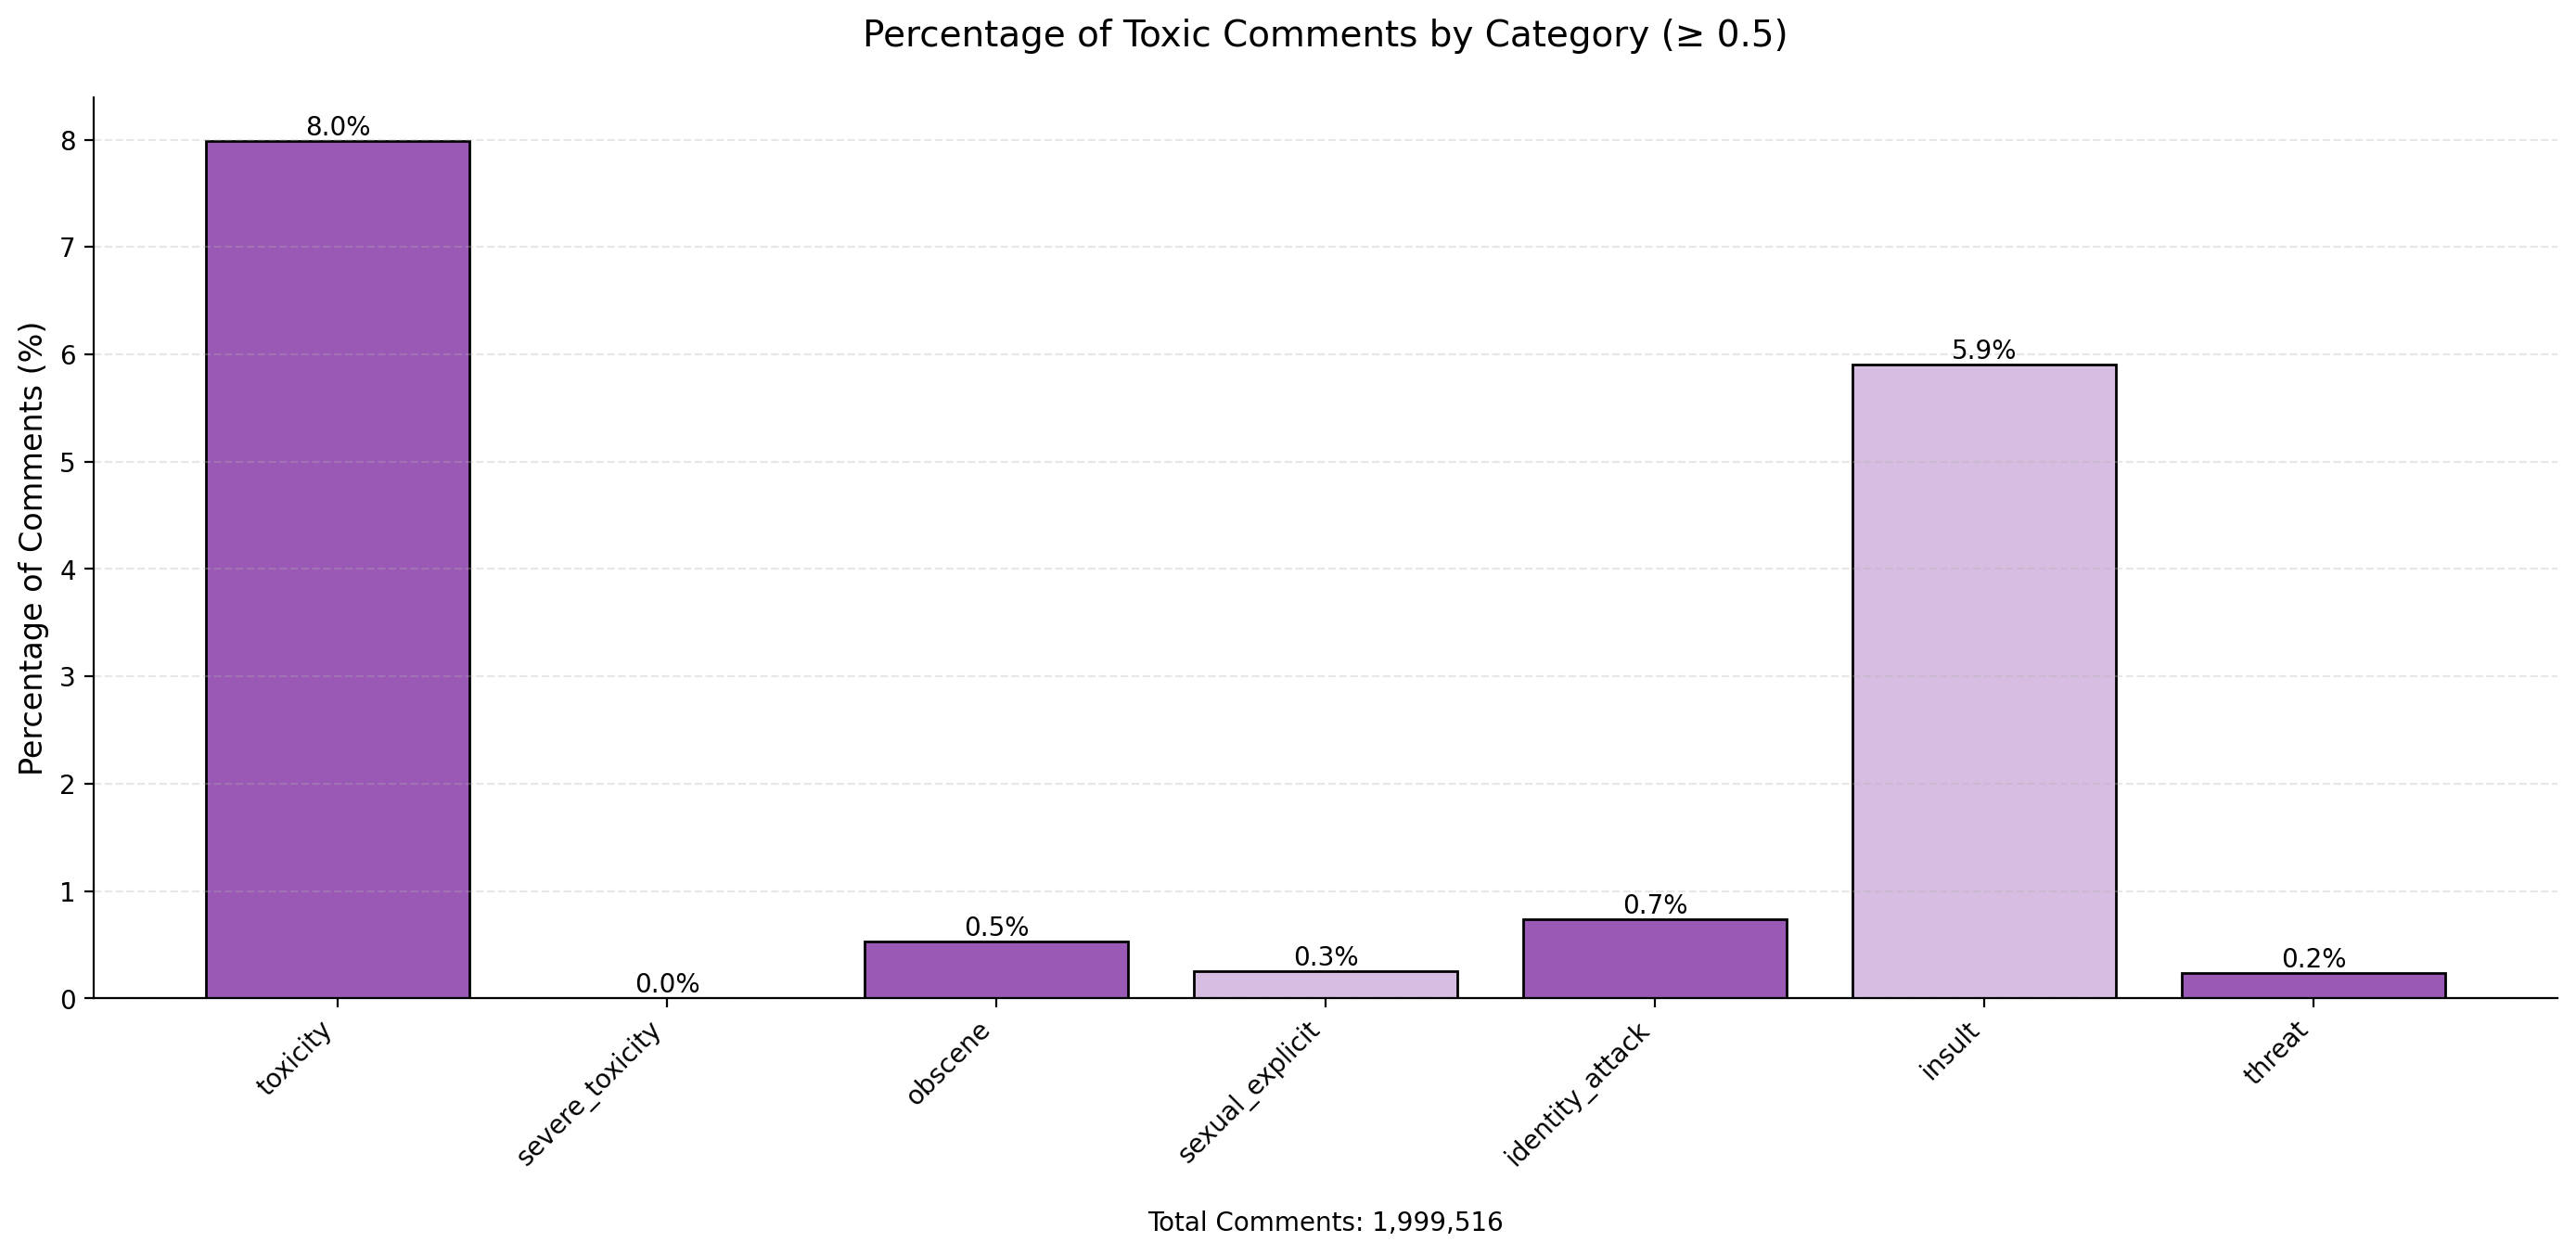


Category Percentages and Counts:
toxicity: 7.99% (159,782 comments)
severe_toxicity: 0.00% (13 comments)
obscene: 0.53% (10,671 comments)
sexual_explicit: 0.26% (5,127 comments)
identity_attack: 0.74% (14,761 comments)
insult: 5.91% (118,079 comments)
threat: 0.24% (4,725 comments)


In [97]:
# Calculate percentages
total_samples = len(df)
toxic_percentages = {cat: (count/total_samples)*100 for cat, count in toxic_counts.items()}

# Create color gradient
n_categories = len(categories)
colors = [purple_palette[i % len(purple_palette)] for i in range(n_categories)]


# Create percentage bar plot
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(toxic_percentages)), list(toxic_percentages.values()), 
               color=colors, edgecolor='black')

# Customize the plot
plt.xticks(range(len(toxic_percentages)), categories, rotation=45, ha='right')
plt.ylabel('Percentage of Comments (%)', fontsize=12)
plt.title('Percentage of Toxic Comments by Category (≥ 0.5)', fontsize=14, pad=20)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

# Add total samples information
plt.text(0.5, -0.25, f'Total Comments: {total_samples:,}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Print the exact percentages and counts
print("\nCategory Percentages and Counts:")
for category, percentage in toxic_percentages.items():
    count = toxic_counts[category]
    print(f"{category}: {percentage:.2f}% ({count:,} comments)")

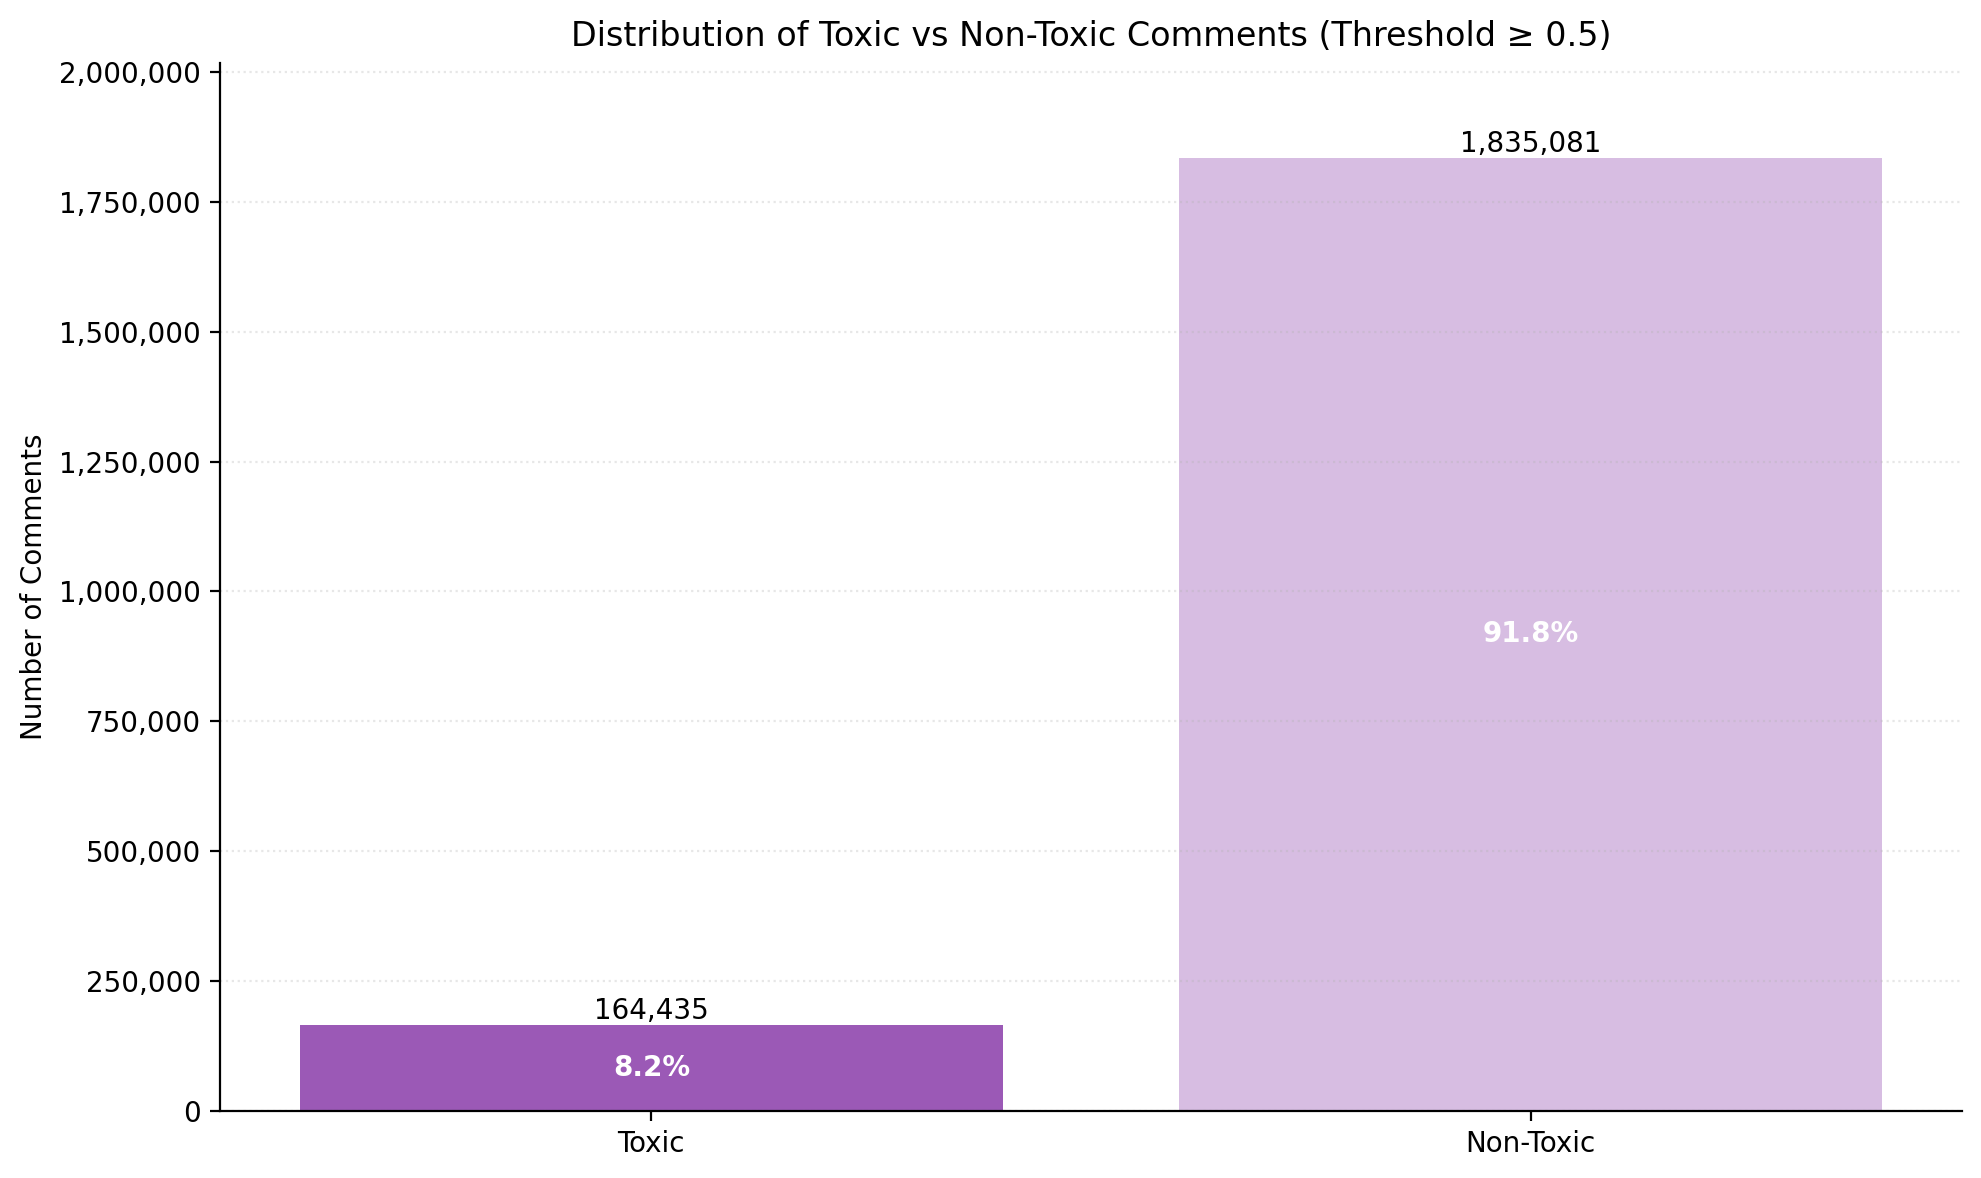

In [100]:
# Calculate toxic comments (any category >= 0.5)
categories = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
              'identity_attack', 'insult', 'threat']

toxic_mask = df[categories].ge(0.5).any(axis=1)
toxic_count = toxic_mask.sum()
non_toxic_count = len(df) - toxic_count

# Create bar plot with better colors
plt.figure(figsize=(10, 6))
bars = plt.bar(['Toxic', 'Non-Toxic'], [toxic_count, non_toxic_count], 
               color=['#9b59b6', '#D7BDE2'])  # Dark purple and light purple

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add percentage labels inside bars
total = toxic_count + non_toxic_count
for bar in bars:
    percentage = (bar.get_height() / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
             f'{percentage:.1f}%',
             ha='center', va='center', color='white', fontweight='bold')

# Improve y-axis formatting
plt.grid(True, axis='y', alpha=0.3)
plt.title('Distribution of Toxic vs Non-Toxic Comments (Threshold ≥ 0.5)')
plt.ylabel('Number of Comments')

# Format y-axis with comma separators
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Calculate appropriate y-axis limit with some headroom
max_count = max(toxic_count, non_toxic_count)
plt.ylim(0, max_count * 1.1)  # Add 10% headroom

# Add more tick marks for better readability
plt.locator_params(axis='y', nbins=10)

plt.tight_layout()
plt.show()


# Identity Analyses